## Libraries 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(16,10))

In [3]:
import json

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
#!pip install lightgbm
import lightgbm as lgb

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Model
from pathlib import Path

In [8]:
from keras.optimizers import Adam
from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import LeakyReLU

In [10]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
from sklearn.model_selection import cross_val_score, cross_validate ,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---------------

## Functions

In [12]:
def checkBalance(dataset,target_name):
    print("=======================================")
    print(f"Target Name : {target_name}")
    print("=======================================")
    print("value count")
    print(dataset[target_name].value_counts())
    print("=======================================")
    sns.histplot(x =target_name,data = dataset)
    plt.show()

In [13]:
def check_unique(dataframe,feature_name,target_name):
    # get a list of the unique values 
    uniqueLst = list(dataframe[feature_name].unique())
    # the length of the unique values 
    uniquelength = len(uniqueLst)
    # count the appenrance of each value in the dataset 
    count = dataframe[feature_name].value_counts()
    sorted_count = count.sort_values() 
    # print some information about the feature 
    print(f"Feature : {feature_name}")
    print(f"Number of unique values : {uniquelength}")
    print("=================================")
    print("(Attack'category,count)")
    print(sorted_count)
    print("=================================")
    #sns.histplot(data=, x=feature_name,hue="label", kde=True)
    sns.displot(x =feature_name,hue=target_name,data = dataframe, kind="kde", multiple="stack")
    plt.show()

In [14]:
def count_number_word(lst_of_lst):
    
    wv_lens =[]

    for x in lst_of_lst:
         wv_lens.append(len(x))

    myset = set(wv_lens)

    counts = [wv_lens.count(x)for x in myset]

    df2 = pd.DataFrame({
        "number of words":list(myset),
        "count":counts
    })
    
    return df2


In [15]:
def padd_zeros(row,n_words):
    # get number of words in this row
    length = len(row)
    # create new list that contain the value of the new length 
    new_lst = []
    
    for i in range(n_words):
        if i < length:
            new_lst.append(row[i])
        else:
    
            listofzeros = [0]*100
            new_lst.append(list(listofzeros))   
        
        
    row = new_lst
    
    return row

In [16]:
def prepare_equalWords_data(data,n_words):
    # create a new data frame 
    nemDF = data.copy()
    # pad zeros 
    nemDF['word_vector'] = nemDF['word_vector'].apply(lambda row: padd_zeros(row,n_words)) 
    # recount again 
    nemDF['word_count']  = nemDF['word_vector'].apply(lambda x: len(x))    
    # encode the label to be 0 and 1 instead 1 and 2 
    nemDF['label']  = nemDF['label'].apply(lambda x: int(x-1))    
    
    return nemDF

In [17]:
def visualize_class(data,y):
    plt.figure(figsize=(20,20))
    
    s= [v== y for v in data['label']]
    idxs = np.flatnonzero(s)
    idxs = np.random.choice(idxs, 5, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(1,5, i+1)
        plt.imshow(data['word_vector'][idx])
        plt.axis('off')
        plt.title(y)
    plt.show()
            
def visualize_classes(data,classes):
    for y in classes:
        visualize_class(data,y)
    

In [18]:
def normalize_lst(a):
    lst = np.array(a).reshape(-1,1)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    normalizedlist=scaler.fit_transform(lst)
    return normalizedlist

In [19]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [20]:
import keras.backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [21]:
def plot_report_confusionMatrix(y_pred,y_true):
    cm = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred))
    plot_report_confusionMatrix(y_pred,y_true)
    print("==============================================================")
    return f1_score(y_true, y_pred) 

def apply_CV_F1(model,X,y):
    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
    print("==============================================================")
    print(f"the f1-score in all iterations       : {nested_score}")
    print(f"the mean of f1-scores                : {nested_score.mean()}")
    print(f"the std  of f1-scores                : {nested_score.std()}")
    print("==============================================================")
    return nested_score.mean() , nested_score.std(),nested_score

--------------

### read the data 

In [47]:
data5_2 = pd.read_csv("data25.csv")
data5_2['word_vector'] = [json.loads(x) for x in data5_2['word_vector']] # list of lists 

In [48]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,25
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,25
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,25
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,25
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,25


### make each row as only one list instead of list of lists 

In [49]:
X_oneLstPerRow = get_words(data5_2,25)

In [59]:
len(X_oneLstPerRow[0])

2500

In [50]:
len(X_oneLstPerRow)

123040

### split the data 

In [51]:
y = data5_2['label']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_oneLstPerRow, y, test_size=0.2,stratify=y, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train, random_state=1) 

In [53]:
pd.DataFrame(y_train).value_counts()

label
0        36912
1        36912
dtype: int64

In [54]:
pd.DataFrame(y_val).value_counts()

label
0        12304
1        12304
dtype: int64

In [55]:
pd.DataFrame(y_test).value_counts()

label
0        12304
1        12304
dtype: int64

<h3 style="color:maroon;"> Normalize each word to be in 0 to 1 scale </h3>

In [56]:
#lst = np.array().reshape(-1,1)
scaler  = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

### Reshape the data so it can be used as images 

--------

<h2 style="color:rgb(74, 70, 11);">Part 0</h2>

<h3 style="color:maroon;">BaseLine model</h3>

### Models 

In [60]:
# dicision_tree
decTree_CLF = DecisionTreeClassifier(random_state=0)
# XG_boost
xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
# random_forest
rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)
# AdaBoost
ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)
# HistGradientBoostingClassifier
gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)
# CatBoostClassifier
catBoost_CLF = CatBoostClassifier(random_state=0)
# LGBMClassifier
lightGBM_CLF = lgb.LGBMClassifier(random_state=0)

In [61]:
components=[5,10,20,30,50]
models = [decTree_CLF ,xgb_CLF ,rf_CLF ,ada_CLF ,gradiant_boost_CLF ,catBoost_CLF ,lightGBM_CLF]
models_names = ['dicision_tree','XG_boost','random_forest','AdaBoost','HistGradientBoostingClassifier','CatBoostClassifier','LGBMClassifier']
f1_scores = []
combinations = []
def get_f1_score_4_PCA(X_tr,y_tr,X_val,y_val,model):
    clf =model.fit(X_tr, y_tr)
    pred=clf.predict(X_val)
    f1_score_value = f1_score(pred, y_val) 
    return f1_score_value

for i in components:
    # create instance from PCA 
    pca = PCA(n_components=i,random_state=0)
    
    # fit PCA 
    X_train_pca =pca.fit_transform(X_train)
    X_val_pca   =pca.transform(X_val)
    
    for j, m in enumerate(models): 
        f1_score_value = get_f1_score_4_PCA(X_train_pca,y_train,X_val_pca,y_val,m)
        f1_scores.append(f1_score_value)
        st = f"{models_names[j]} , C:{i}"
        print(f"{models_names[j]} ,f1: {f1_score_value:.3f}, C:{i}")
        combinations.append(st)
    

dicision_tree ,f1: 0.729, C:5
XG_boost ,f1: 0.727, C:5
random_forest ,f1: 0.732, C:5
AdaBoost ,f1: 0.716, C:5
HistGradientBoostingClassifier ,f1: 0.804, C:5
Learning rate set to 0.064663
0:	learn: 0.6380735	total: 17.7ms	remaining: 17.7s
1:	learn: 0.5974934	total: 29.8ms	remaining: 14.9s
2:	learn: 0.5638863	total: 42.4ms	remaining: 14.1s
3:	learn: 0.5362052	total: 52.8ms	remaining: 13.1s
4:	learn: 0.5191301	total: 63.4ms	remaining: 12.6s
5:	learn: 0.5021998	total: 74.7ms	remaining: 12.4s
6:	learn: 0.4908027	total: 83.9ms	remaining: 11.9s
7:	learn: 0.4809420	total: 92.8ms	remaining: 11.5s
8:	learn: 0.4720111	total: 101ms	remaining: 11.2s
9:	learn: 0.4615747	total: 111ms	remaining: 11s
10:	learn: 0.4534048	total: 120ms	remaining: 10.8s
11:	learn: 0.4473842	total: 128ms	remaining: 10.5s
12:	learn: 0.4427422	total: 136ms	remaining: 10.3s
13:	learn: 0.4360348	total: 147ms	remaining: 10.4s
14:	learn: 0.4300389	total: 156ms	remaining: 10.2s
15:	learn: 0.4253901	total: 164ms	remaining: 10.1s
1

161:	learn: 0.3376804	total: 1.47s	remaining: 7.62s
162:	learn: 0.3375122	total: 1.48s	remaining: 7.61s
163:	learn: 0.3373817	total: 1.49s	remaining: 7.6s
164:	learn: 0.3371532	total: 1.5s	remaining: 7.59s
165:	learn: 0.3369977	total: 1.51s	remaining: 7.58s
166:	learn: 0.3369151	total: 1.52s	remaining: 7.57s
167:	learn: 0.3368117	total: 1.53s	remaining: 7.56s
168:	learn: 0.3366148	total: 1.53s	remaining: 7.55s
169:	learn: 0.3365256	total: 1.54s	remaining: 7.54s
170:	learn: 0.3363591	total: 1.55s	remaining: 7.52s
171:	learn: 0.3362328	total: 1.56s	remaining: 7.51s
172:	learn: 0.3361461	total: 1.57s	remaining: 7.5s
173:	learn: 0.3360895	total: 1.58s	remaining: 7.48s
174:	learn: 0.3360004	total: 1.58s	remaining: 7.47s
175:	learn: 0.3357543	total: 1.59s	remaining: 7.46s
176:	learn: 0.3356199	total: 1.6s	remaining: 7.45s
177:	learn: 0.3354414	total: 1.61s	remaining: 7.44s
178:	learn: 0.3353370	total: 1.62s	remaining: 7.42s
179:	learn: 0.3352781	total: 1.63s	remaining: 7.41s
180:	learn: 0.33

331:	learn: 0.3220345	total: 3.01s	remaining: 6.05s
332:	learn: 0.3219880	total: 3.02s	remaining: 6.04s
333:	learn: 0.3219251	total: 3.03s	remaining: 6.04s
334:	learn: 0.3218016	total: 3.04s	remaining: 6.03s
335:	learn: 0.3217646	total: 3.04s	remaining: 6.02s
336:	learn: 0.3217148	total: 3.05s	remaining: 6.01s
337:	learn: 0.3216069	total: 3.06s	remaining: 6s
338:	learn: 0.3215327	total: 3.07s	remaining: 5.99s
339:	learn: 0.3214624	total: 3.08s	remaining: 5.98s
340:	learn: 0.3214383	total: 3.09s	remaining: 5.97s
341:	learn: 0.3213708	total: 3.1s	remaining: 5.96s
342:	learn: 0.3213249	total: 3.1s	remaining: 5.95s
343:	learn: 0.3212693	total: 3.11s	remaining: 5.94s
344:	learn: 0.3212434	total: 3.12s	remaining: 5.93s
345:	learn: 0.3211910	total: 3.13s	remaining: 5.92s
346:	learn: 0.3211486	total: 3.14s	remaining: 5.91s
347:	learn: 0.3210694	total: 3.15s	remaining: 5.9s
348:	learn: 0.3209253	total: 3.16s	remaining: 5.89s
349:	learn: 0.3208829	total: 3.17s	remaining: 5.88s
350:	learn: 0.3208

497:	learn: 0.3142758	total: 4.52s	remaining: 4.56s
498:	learn: 0.3141839	total: 4.53s	remaining: 4.55s
499:	learn: 0.3141498	total: 4.54s	remaining: 4.54s
500:	learn: 0.3141139	total: 4.55s	remaining: 4.53s
501:	learn: 0.3140601	total: 4.56s	remaining: 4.52s
502:	learn: 0.3140271	total: 4.57s	remaining: 4.51s
503:	learn: 0.3140104	total: 4.58s	remaining: 4.51s
504:	learn: 0.3139541	total: 4.59s	remaining: 4.5s
505:	learn: 0.3139337	total: 4.6s	remaining: 4.49s
506:	learn: 0.3139169	total: 4.61s	remaining: 4.48s
507:	learn: 0.3138603	total: 4.62s	remaining: 4.47s
508:	learn: 0.3138447	total: 4.63s	remaining: 4.46s
509:	learn: 0.3138381	total: 4.63s	remaining: 4.45s
510:	learn: 0.3138154	total: 4.64s	remaining: 4.44s
511:	learn: 0.3137991	total: 4.65s	remaining: 4.43s
512:	learn: 0.3137473	total: 4.66s	remaining: 4.42s
513:	learn: 0.3136834	total: 4.67s	remaining: 4.42s
514:	learn: 0.3136564	total: 4.68s	remaining: 4.41s
515:	learn: 0.3136487	total: 4.69s	remaining: 4.4s
516:	learn: 0.3

674:	learn: 0.3093742	total: 6.06s	remaining: 2.92s
675:	learn: 0.3093608	total: 6.07s	remaining: 2.91s
676:	learn: 0.3093346	total: 6.08s	remaining: 2.9s
677:	learn: 0.3093214	total: 6.09s	remaining: 2.89s
678:	learn: 0.3093036	total: 6.1s	remaining: 2.88s
679:	learn: 0.3092740	total: 6.11s	remaining: 2.87s
680:	learn: 0.3092684	total: 6.12s	remaining: 2.86s
681:	learn: 0.3092396	total: 6.12s	remaining: 2.85s
682:	learn: 0.3092179	total: 6.13s	remaining: 2.85s
683:	learn: 0.3091998	total: 6.14s	remaining: 2.84s
684:	learn: 0.3091821	total: 6.15s	remaining: 2.83s
685:	learn: 0.3091564	total: 6.16s	remaining: 2.82s
686:	learn: 0.3091462	total: 6.17s	remaining: 2.81s
687:	learn: 0.3091226	total: 6.18s	remaining: 2.8s
688:	learn: 0.3091052	total: 6.19s	remaining: 2.79s
689:	learn: 0.3090896	total: 6.2s	remaining: 2.78s
690:	learn: 0.3090670	total: 6.21s	remaining: 2.77s
691:	learn: 0.3090409	total: 6.22s	remaining: 2.77s
692:	learn: 0.3090313	total: 6.22s	remaining: 2.76s
693:	learn: 0.30

847:	learn: 0.3059457	total: 7.57s	remaining: 1.36s
848:	learn: 0.3059390	total: 7.58s	remaining: 1.35s
849:	learn: 0.3059362	total: 7.59s	remaining: 1.34s
850:	learn: 0.3059206	total: 7.6s	remaining: 1.33s
851:	learn: 0.3059124	total: 7.61s	remaining: 1.32s
852:	learn: 0.3058910	total: 7.61s	remaining: 1.31s
853:	learn: 0.3058541	total: 7.62s	remaining: 1.3s
854:	learn: 0.3058408	total: 7.63s	remaining: 1.29s
855:	learn: 0.3058275	total: 7.64s	remaining: 1.28s
856:	learn: 0.3058024	total: 7.64s	remaining: 1.27s
857:	learn: 0.3057705	total: 7.65s	remaining: 1.27s
858:	learn: 0.3057514	total: 7.66s	remaining: 1.26s
859:	learn: 0.3057431	total: 7.67s	remaining: 1.25s
860:	learn: 0.3057279	total: 7.68s	remaining: 1.24s
861:	learn: 0.3057146	total: 7.69s	remaining: 1.23s
862:	learn: 0.3057061	total: 7.7s	remaining: 1.22s
863:	learn: 0.3056921	total: 7.7s	remaining: 1.21s
864:	learn: 0.3056688	total: 7.71s	remaining: 1.2s
865:	learn: 0.3056526	total: 7.72s	remaining: 1.19s
866:	learn: 0.305

12:	learn: 0.4154195	total: 136ms	remaining: 10.4s
13:	learn: 0.4111416	total: 145ms	remaining: 10.2s
14:	learn: 0.4077631	total: 154ms	remaining: 10.1s
15:	learn: 0.4024335	total: 162ms	remaining: 9.95s
16:	learn: 0.3991641	total: 170ms	remaining: 9.86s
17:	learn: 0.3967691	total: 179ms	remaining: 9.77s
18:	learn: 0.3939045	total: 187ms	remaining: 9.67s
19:	learn: 0.3916118	total: 195ms	remaining: 9.56s
20:	learn: 0.3904090	total: 203ms	remaining: 9.46s
21:	learn: 0.3872523	total: 211ms	remaining: 9.38s
22:	learn: 0.3859838	total: 219ms	remaining: 9.3s
23:	learn: 0.3826862	total: 227ms	remaining: 9.24s
24:	learn: 0.3817189	total: 236ms	remaining: 9.19s
25:	learn: 0.3800750	total: 247ms	remaining: 9.25s
26:	learn: 0.3789413	total: 255ms	remaining: 9.2s
27:	learn: 0.3765839	total: 264ms	remaining: 9.15s
28:	learn: 0.3744493	total: 272ms	remaining: 9.12s
29:	learn: 0.3732134	total: 281ms	remaining: 9.09s
30:	learn: 0.3714189	total: 289ms	remaining: 9.04s
31:	learn: 0.3706745	total: 297ms

174:	learn: 0.3261167	total: 1.5s	remaining: 7.06s
175:	learn: 0.3260585	total: 1.51s	remaining: 7.05s
176:	learn: 0.3259904	total: 1.51s	remaining: 7.04s
177:	learn: 0.3258853	total: 1.52s	remaining: 7.03s
178:	learn: 0.3256914	total: 1.53s	remaining: 7.02s
179:	learn: 0.3255907	total: 1.54s	remaining: 7.01s
180:	learn: 0.3254956	total: 1.55s	remaining: 7s
181:	learn: 0.3253224	total: 1.56s	remaining: 7s
182:	learn: 0.3252391	total: 1.56s	remaining: 6.99s
183:	learn: 0.3251663	total: 1.57s	remaining: 6.97s
184:	learn: 0.3251078	total: 1.58s	remaining: 6.96s
185:	learn: 0.3249581	total: 1.59s	remaining: 6.96s
186:	learn: 0.3248999	total: 1.6s	remaining: 6.94s
187:	learn: 0.3248249	total: 1.6s	remaining: 6.93s
188:	learn: 0.3247029	total: 1.61s	remaining: 6.93s
189:	learn: 0.3246252	total: 1.62s	remaining: 6.92s
190:	learn: 0.3245445	total: 1.63s	remaining: 6.9s
191:	learn: 0.3244805	total: 1.64s	remaining: 6.89s
192:	learn: 0.3244281	total: 1.65s	remaining: 6.88s
193:	learn: 0.3243945	

335:	learn: 0.3137154	total: 2.85s	remaining: 5.63s
336:	learn: 0.3136959	total: 2.86s	remaining: 5.62s
337:	learn: 0.3136437	total: 2.87s	remaining: 5.62s
338:	learn: 0.3135759	total: 2.88s	remaining: 5.61s
339:	learn: 0.3135482	total: 2.88s	remaining: 5.6s
340:	learn: 0.3135110	total: 2.89s	remaining: 5.59s
341:	learn: 0.3134554	total: 2.9s	remaining: 5.58s
342:	learn: 0.3134030	total: 2.91s	remaining: 5.57s
343:	learn: 0.3133169	total: 2.92s	remaining: 5.57s
344:	learn: 0.3132137	total: 2.93s	remaining: 5.56s
345:	learn: 0.3131633	total: 2.94s	remaining: 5.55s
346:	learn: 0.3131377	total: 2.94s	remaining: 5.54s
347:	learn: 0.3130785	total: 2.95s	remaining: 5.53s
348:	learn: 0.3130672	total: 2.96s	remaining: 5.52s
349:	learn: 0.3130083	total: 2.97s	remaining: 5.51s
350:	learn: 0.3129688	total: 2.98s	remaining: 5.5s
351:	learn: 0.3128290	total: 2.98s	remaining: 5.5s
352:	learn: 0.3127397	total: 2.99s	remaining: 5.49s
353:	learn: 0.3127024	total: 3s	remaining: 5.48s
354:	learn: 0.31265

516:	learn: 0.3064763	total: 4.4s	remaining: 4.11s
517:	learn: 0.3064502	total: 4.41s	remaining: 4.1s
518:	learn: 0.3063837	total: 4.42s	remaining: 4.09s
519:	learn: 0.3063584	total: 4.43s	remaining: 4.09s
520:	learn: 0.3063377	total: 4.43s	remaining: 4.08s
521:	learn: 0.3063285	total: 4.44s	remaining: 4.07s
522:	learn: 0.3063034	total: 4.45s	remaining: 4.06s
523:	learn: 0.3062509	total: 4.46s	remaining: 4.05s
524:	learn: 0.3062380	total: 4.47s	remaining: 4.04s
525:	learn: 0.3061966	total: 4.48s	remaining: 4.03s
526:	learn: 0.3061499	total: 4.48s	remaining: 4.03s
527:	learn: 0.3061271	total: 4.49s	remaining: 4.02s
528:	learn: 0.3060857	total: 4.5s	remaining: 4.01s
529:	learn: 0.3060665	total: 4.51s	remaining: 4s
530:	learn: 0.3060492	total: 4.52s	remaining: 3.99s
531:	learn: 0.3060065	total: 4.53s	remaining: 3.98s
532:	learn: 0.3059519	total: 4.54s	remaining: 3.97s
533:	learn: 0.3058948	total: 4.54s	remaining: 3.96s
534:	learn: 0.3058849	total: 4.55s	remaining: 3.96s
535:	learn: 0.3058

682:	learn: 0.3023201	total: 5.78s	remaining: 2.68s
683:	learn: 0.3023145	total: 5.79s	remaining: 2.67s
684:	learn: 0.3022897	total: 5.8s	remaining: 2.67s
685:	learn: 0.3022729	total: 5.81s	remaining: 2.66s
686:	learn: 0.3022547	total: 5.82s	remaining: 2.65s
687:	learn: 0.3022385	total: 5.83s	remaining: 2.64s
688:	learn: 0.3022141	total: 5.83s	remaining: 2.63s
689:	learn: 0.3022010	total: 5.84s	remaining: 2.63s
690:	learn: 0.3021739	total: 5.85s	remaining: 2.62s
691:	learn: 0.3021572	total: 5.86s	remaining: 2.61s
692:	learn: 0.3021307	total: 5.87s	remaining: 2.6s
693:	learn: 0.3021266	total: 5.88s	remaining: 2.59s
694:	learn: 0.3021047	total: 5.89s	remaining: 2.58s
695:	learn: 0.3020639	total: 5.9s	remaining: 2.58s
696:	learn: 0.3020467	total: 5.91s	remaining: 2.57s
697:	learn: 0.3020313	total: 5.92s	remaining: 2.56s
698:	learn: 0.3020253	total: 5.93s	remaining: 2.55s
699:	learn: 0.3020137	total: 5.94s	remaining: 2.55s
700:	learn: 0.3020028	total: 5.95s	remaining: 2.54s
701:	learn: 0.3

863:	learn: 0.2992625	total: 7.32s	remaining: 1.15s
864:	learn: 0.2992386	total: 7.33s	remaining: 1.14s
865:	learn: 0.2992232	total: 7.34s	remaining: 1.14s
866:	learn: 0.2992101	total: 7.35s	remaining: 1.13s
867:	learn: 0.2991921	total: 7.36s	remaining: 1.12s
868:	learn: 0.2991829	total: 7.37s	remaining: 1.11s
869:	learn: 0.2991524	total: 7.37s	remaining: 1.1s
870:	learn: 0.2991462	total: 7.38s	remaining: 1.09s
871:	learn: 0.2991357	total: 7.39s	remaining: 1.08s
872:	learn: 0.2991169	total: 7.4s	remaining: 1.08s
873:	learn: 0.2991130	total: 7.41s	remaining: 1.07s
874:	learn: 0.2991077	total: 7.42s	remaining: 1.06s
875:	learn: 0.2991025	total: 7.42s	remaining: 1.05s
876:	learn: 0.2990918	total: 7.43s	remaining: 1.04s
877:	learn: 0.2990799	total: 7.44s	remaining: 1.03s
878:	learn: 0.2990689	total: 7.45s	remaining: 1.02s
879:	learn: 0.2990573	total: 7.46s	remaining: 1.02s
880:	learn: 0.2990315	total: 7.46s	remaining: 1.01s
881:	learn: 0.2990063	total: 7.47s	remaining: 1000ms
882:	learn: 0

32:	learn: 0.3649924	total: 345ms	remaining: 10.1s
33:	learn: 0.3636052	total: 356ms	remaining: 10.1s
34:	learn: 0.3629403	total: 365ms	remaining: 10.1s
35:	learn: 0.3622845	total: 376ms	remaining: 10.1s
36:	learn: 0.3611833	total: 386ms	remaining: 10s
37:	learn: 0.3602621	total: 395ms	remaining: 10s
38:	learn: 0.3592433	total: 406ms	remaining: 10s
39:	learn: 0.3584314	total: 415ms	remaining: 9.97s
40:	learn: 0.3572903	total: 425ms	remaining: 9.94s
41:	learn: 0.3558863	total: 435ms	remaining: 9.93s
42:	learn: 0.3551745	total: 445ms	remaining: 9.9s
43:	learn: 0.3543308	total: 455ms	remaining: 9.88s
44:	learn: 0.3536040	total: 465ms	remaining: 9.86s
45:	learn: 0.3531250	total: 475ms	remaining: 9.85s
46:	learn: 0.3525165	total: 485ms	remaining: 9.83s
47:	learn: 0.3520051	total: 494ms	remaining: 9.8s
48:	learn: 0.3509031	total: 505ms	remaining: 9.79s
49:	learn: 0.3505099	total: 514ms	remaining: 9.77s
50:	learn: 0.3499217	total: 523ms	remaining: 9.74s
51:	learn: 0.3495687	total: 533ms	remai

206:	learn: 0.3161883	total: 2.18s	remaining: 8.34s
207:	learn: 0.3160714	total: 2.19s	remaining: 8.33s
208:	learn: 0.3159412	total: 2.2s	remaining: 8.32s
209:	learn: 0.3158267	total: 2.21s	remaining: 8.32s
210:	learn: 0.3157349	total: 2.22s	remaining: 8.31s
211:	learn: 0.3156675	total: 2.23s	remaining: 8.3s
212:	learn: 0.3155927	total: 2.24s	remaining: 8.28s
213:	learn: 0.3155361	total: 2.25s	remaining: 8.28s
214:	learn: 0.3154898	total: 2.27s	remaining: 8.28s
215:	learn: 0.3154571	total: 2.28s	remaining: 8.28s
216:	learn: 0.3152857	total: 2.29s	remaining: 8.28s
217:	learn: 0.3152198	total: 2.31s	remaining: 8.28s
218:	learn: 0.3151229	total: 2.32s	remaining: 8.27s
219:	learn: 0.3150073	total: 2.33s	remaining: 8.26s
220:	learn: 0.3149473	total: 2.34s	remaining: 8.25s
221:	learn: 0.3148282	total: 2.36s	remaining: 8.26s
222:	learn: 0.3147039	total: 2.37s	remaining: 8.27s
223:	learn: 0.3146242	total: 2.38s	remaining: 8.26s
224:	learn: 0.3145501	total: 2.39s	remaining: 8.25s
225:	learn: 0.

370:	learn: 0.3056663	total: 3.97s	remaining: 6.73s
371:	learn: 0.3055966	total: 3.98s	remaining: 6.72s
372:	learn: 0.3055723	total: 3.99s	remaining: 6.71s
373:	learn: 0.3055396	total: 4s	remaining: 6.7s
374:	learn: 0.3055114	total: 4.01s	remaining: 6.69s
375:	learn: 0.3054366	total: 4.03s	remaining: 6.68s
376:	learn: 0.3053862	total: 4.04s	remaining: 6.67s
377:	learn: 0.3052991	total: 4.05s	remaining: 6.66s
378:	learn: 0.3052208	total: 4.06s	remaining: 6.65s
379:	learn: 0.3051315	total: 4.07s	remaining: 6.64s
380:	learn: 0.3050425	total: 4.08s	remaining: 6.63s
381:	learn: 0.3050112	total: 4.09s	remaining: 6.62s
382:	learn: 0.3049753	total: 4.1s	remaining: 6.61s
383:	learn: 0.3048765	total: 4.11s	remaining: 6.59s
384:	learn: 0.3048544	total: 4.12s	remaining: 6.58s
385:	learn: 0.3048009	total: 4.13s	remaining: 6.57s
386:	learn: 0.3047612	total: 4.14s	remaining: 6.56s
387:	learn: 0.3047426	total: 4.15s	remaining: 6.54s
388:	learn: 0.3046844	total: 4.16s	remaining: 6.53s
389:	learn: 0.304

532:	learn: 0.3004791	total: 5.77s	remaining: 5.05s
533:	learn: 0.3004302	total: 5.79s	remaining: 5.06s
534:	learn: 0.3003948	total: 5.81s	remaining: 5.05s
535:	learn: 0.3003775	total: 5.82s	remaining: 5.04s
536:	learn: 0.3003614	total: 5.83s	remaining: 5.03s
537:	learn: 0.3003397	total: 5.84s	remaining: 5.02s
538:	learn: 0.3003153	total: 5.85s	remaining: 5s
539:	learn: 0.3002749	total: 5.86s	remaining: 4.99s
540:	learn: 0.3002050	total: 5.87s	remaining: 4.98s
541:	learn: 0.3001840	total: 5.88s	remaining: 4.97s
542:	learn: 0.3001514	total: 5.89s	remaining: 4.96s
543:	learn: 0.3001455	total: 5.91s	remaining: 4.95s
544:	learn: 0.3001265	total: 5.92s	remaining: 4.94s
545:	learn: 0.3001169	total: 5.93s	remaining: 4.93s
546:	learn: 0.3000941	total: 5.94s	remaining: 4.92s
547:	learn: 0.3000834	total: 5.95s	remaining: 4.91s
548:	learn: 0.3000653	total: 5.96s	remaining: 4.9s
549:	learn: 0.3000473	total: 5.97s	remaining: 4.89s
550:	learn: 0.3000195	total: 5.98s	remaining: 4.88s
551:	learn: 0.29

698:	learn: 0.2972676	total: 7.52s	remaining: 3.24s
699:	learn: 0.2972568	total: 7.53s	remaining: 3.23s
700:	learn: 0.2972464	total: 7.54s	remaining: 3.22s
701:	learn: 0.2972315	total: 7.55s	remaining: 3.21s
702:	learn: 0.2972063	total: 7.56s	remaining: 3.19s
703:	learn: 0.2971919	total: 7.57s	remaining: 3.18s
704:	learn: 0.2971771	total: 7.58s	remaining: 3.17s
705:	learn: 0.2971703	total: 7.59s	remaining: 3.16s
706:	learn: 0.2971558	total: 7.61s	remaining: 3.15s
707:	learn: 0.2971500	total: 7.62s	remaining: 3.14s
708:	learn: 0.2971260	total: 7.63s	remaining: 3.13s
709:	learn: 0.2971172	total: 7.63s	remaining: 3.12s
710:	learn: 0.2971083	total: 7.65s	remaining: 3.11s
711:	learn: 0.2970992	total: 7.66s	remaining: 3.1s
712:	learn: 0.2970878	total: 7.67s	remaining: 3.08s
713:	learn: 0.2970756	total: 7.68s	remaining: 3.07s
714:	learn: 0.2970591	total: 7.68s	remaining: 3.06s
715:	learn: 0.2970443	total: 7.7s	remaining: 3.05s
716:	learn: 0.2970348	total: 7.71s	remaining: 3.04s
717:	learn: 0.

864:	learn: 0.2953546	total: 9.31s	remaining: 1.45s
865:	learn: 0.2953514	total: 9.33s	remaining: 1.44s
866:	learn: 0.2953279	total: 9.34s	remaining: 1.43s
867:	learn: 0.2953138	total: 9.35s	remaining: 1.42s
868:	learn: 0.2952956	total: 9.36s	remaining: 1.41s
869:	learn: 0.2952884	total: 9.37s	remaining: 1.4s
870:	learn: 0.2952792	total: 9.38s	remaining: 1.39s
871:	learn: 0.2952625	total: 9.39s	remaining: 1.38s
872:	learn: 0.2952618	total: 9.39s	remaining: 1.37s
873:	learn: 0.2952423	total: 9.4s	remaining: 1.35s
874:	learn: 0.2952354	total: 9.41s	remaining: 1.34s
875:	learn: 0.2952181	total: 9.43s	remaining: 1.33s
876:	learn: 0.2952085	total: 9.44s	remaining: 1.32s
877:	learn: 0.2951982	total: 9.44s	remaining: 1.31s
878:	learn: 0.2951831	total: 9.45s	remaining: 1.3s
879:	learn: 0.2951689	total: 9.46s	remaining: 1.29s
880:	learn: 0.2951610	total: 9.47s	remaining: 1.28s
881:	learn: 0.2951549	total: 9.48s	remaining: 1.27s
882:	learn: 0.2951537	total: 9.49s	remaining: 1.26s
883:	learn: 0.2

29:	learn: 0.3646793	total: 343ms	remaining: 11.1s
30:	learn: 0.3637655	total: 356ms	remaining: 11.1s
31:	learn: 0.3631127	total: 367ms	remaining: 11.1s
32:	learn: 0.3617159	total: 379ms	remaining: 11.1s
33:	learn: 0.3605005	total: 390ms	remaining: 11.1s
34:	learn: 0.3599654	total: 400ms	remaining: 11s
35:	learn: 0.3589537	total: 410ms	remaining: 11s
36:	learn: 0.3577951	total: 421ms	remaining: 11s
37:	learn: 0.3568214	total: 432ms	remaining: 10.9s
38:	learn: 0.3560078	total: 443ms	remaining: 10.9s
39:	learn: 0.3548944	total: 455ms	remaining: 10.9s
40:	learn: 0.3544185	total: 467ms	remaining: 10.9s
41:	learn: 0.3531210	total: 478ms	remaining: 10.9s
42:	learn: 0.3523301	total: 489ms	remaining: 10.9s
43:	learn: 0.3517976	total: 500ms	remaining: 10.9s
44:	learn: 0.3512634	total: 512ms	remaining: 10.9s
45:	learn: 0.3506860	total: 524ms	remaining: 10.9s
46:	learn: 0.3500081	total: 538ms	remaining: 10.9s
47:	learn: 0.3493578	total: 551ms	remaining: 10.9s
48:	learn: 0.3488136	total: 564ms	rem

200:	learn: 0.3146338	total: 2.3s	remaining: 9.16s
201:	learn: 0.3143982	total: 2.32s	remaining: 9.15s
202:	learn: 0.3142492	total: 2.33s	remaining: 9.14s
203:	learn: 0.3141306	total: 2.34s	remaining: 9.12s
204:	learn: 0.3138859	total: 2.35s	remaining: 9.11s
205:	learn: 0.3138135	total: 2.36s	remaining: 9.1s
206:	learn: 0.3136707	total: 2.37s	remaining: 9.09s
207:	learn: 0.3135263	total: 2.38s	remaining: 9.07s
208:	learn: 0.3134304	total: 2.39s	remaining: 9.06s
209:	learn: 0.3133675	total: 2.4s	remaining: 9.05s
210:	learn: 0.3132519	total: 2.42s	remaining: 9.04s
211:	learn: 0.3131374	total: 2.43s	remaining: 9.03s
212:	learn: 0.3129729	total: 2.44s	remaining: 9.02s
213:	learn: 0.3128540	total: 2.45s	remaining: 9.01s
214:	learn: 0.3128020	total: 2.46s	remaining: 8.99s
215:	learn: 0.3127677	total: 2.47s	remaining: 8.98s
216:	learn: 0.3127272	total: 2.48s	remaining: 8.96s
217:	learn: 0.3126405	total: 2.5s	remaining: 8.96s
218:	learn: 0.3125675	total: 2.51s	remaining: 8.95s
219:	learn: 0.31

376:	learn: 0.3028909	total: 4.29s	remaining: 7.08s
377:	learn: 0.3028489	total: 4.3s	remaining: 7.08s
378:	learn: 0.3028274	total: 4.31s	remaining: 7.07s
379:	learn: 0.3028147	total: 4.32s	remaining: 7.05s
380:	learn: 0.3027762	total: 4.33s	remaining: 7.04s
381:	learn: 0.3027211	total: 4.34s	remaining: 7.03s
382:	learn: 0.3026810	total: 4.36s	remaining: 7.02s
383:	learn: 0.3026612	total: 4.37s	remaining: 7s
384:	learn: 0.3026330	total: 4.38s	remaining: 6.99s
385:	learn: 0.3025970	total: 4.39s	remaining: 6.98s
386:	learn: 0.3025445	total: 4.4s	remaining: 6.97s
387:	learn: 0.3024971	total: 4.41s	remaining: 6.96s
388:	learn: 0.3024697	total: 4.42s	remaining: 6.94s
389:	learn: 0.3024310	total: 4.43s	remaining: 6.93s
390:	learn: 0.3024162	total: 4.44s	remaining: 6.92s
391:	learn: 0.3023921	total: 4.45s	remaining: 6.91s
392:	learn: 0.3023262	total: 4.46s	remaining: 6.9s
393:	learn: 0.3023066	total: 4.47s	remaining: 6.88s
394:	learn: 0.3022791	total: 4.49s	remaining: 6.88s
395:	learn: 0.3022

535:	learn: 0.2986708	total: 6.06s	remaining: 5.25s
536:	learn: 0.2986626	total: 6.07s	remaining: 5.23s
537:	learn: 0.2986550	total: 6.08s	remaining: 5.22s
538:	learn: 0.2986320	total: 6.09s	remaining: 5.21s
539:	learn: 0.2986274	total: 6.1s	remaining: 5.2s
540:	learn: 0.2986040	total: 6.11s	remaining: 5.19s
541:	learn: 0.2985959	total: 6.12s	remaining: 5.17s
542:	learn: 0.2985871	total: 6.13s	remaining: 5.16s
543:	learn: 0.2985697	total: 6.14s	remaining: 5.15s
544:	learn: 0.2985511	total: 6.15s	remaining: 5.14s
545:	learn: 0.2985374	total: 6.16s	remaining: 5.12s
546:	learn: 0.2985222	total: 6.17s	remaining: 5.11s
547:	learn: 0.2985047	total: 6.18s	remaining: 5.1s
548:	learn: 0.2984904	total: 6.19s	remaining: 5.09s
549:	learn: 0.2984661	total: 6.2s	remaining: 5.08s
550:	learn: 0.2984481	total: 6.22s	remaining: 5.07s
551:	learn: 0.2984267	total: 6.23s	remaining: 5.05s
552:	learn: 0.2984076	total: 6.24s	remaining: 5.04s
553:	learn: 0.2983888	total: 6.25s	remaining: 5.03s
554:	learn: 0.29

699:	learn: 0.2960371	total: 7.86s	remaining: 3.37s
700:	learn: 0.2960371	total: 7.87s	remaining: 3.36s
701:	learn: 0.2960205	total: 7.88s	remaining: 3.35s
702:	learn: 0.2960187	total: 7.89s	remaining: 3.33s
703:	learn: 0.2960098	total: 7.9s	remaining: 3.32s
704:	learn: 0.2959996	total: 7.91s	remaining: 3.31s
705:	learn: 0.2959916	total: 7.92s	remaining: 3.3s
706:	learn: 0.2959690	total: 7.93s	remaining: 3.29s
707:	learn: 0.2959543	total: 7.94s	remaining: 3.28s
708:	learn: 0.2959423	total: 7.96s	remaining: 3.27s
709:	learn: 0.2959263	total: 7.97s	remaining: 3.25s
710:	learn: 0.2959229	total: 7.98s	remaining: 3.24s
711:	learn: 0.2959105	total: 7.99s	remaining: 3.23s
712:	learn: 0.2958993	total: 8s	remaining: 3.22s
713:	learn: 0.2958907	total: 8.01s	remaining: 3.21s
714:	learn: 0.2958871	total: 8.02s	remaining: 3.2s
715:	learn: 0.2958763	total: 8.04s	remaining: 3.19s
716:	learn: 0.2958654	total: 8.05s	remaining: 3.18s
717:	learn: 0.2958506	total: 8.06s	remaining: 3.16s
718:	learn: 0.2958

864:	learn: 0.2942897	total: 9.86s	remaining: 1.54s
865:	learn: 0.2942733	total: 9.87s	remaining: 1.53s
866:	learn: 0.2942642	total: 9.89s	remaining: 1.52s
867:	learn: 0.2942502	total: 9.9s	remaining: 1.5s
868:	learn: 0.2942376	total: 9.91s	remaining: 1.49s
869:	learn: 0.2942260	total: 9.92s	remaining: 1.48s
870:	learn: 0.2942052	total: 9.93s	remaining: 1.47s
871:	learn: 0.2942035	total: 9.94s	remaining: 1.46s
872:	learn: 0.2942055	total: 9.95s	remaining: 1.45s
873:	learn: 0.2941955	total: 9.96s	remaining: 1.44s
874:	learn: 0.2941782	total: 9.97s	remaining: 1.42s
875:	learn: 0.2941643	total: 9.98s	remaining: 1.41s
876:	learn: 0.2941504	total: 9.99s	remaining: 1.4s
877:	learn: 0.2941352	total: 10s	remaining: 1.39s
878:	learn: 0.2941203	total: 10s	remaining: 1.38s
879:	learn: 0.2941132	total: 10s	remaining: 1.37s
880:	learn: 0.2941068	total: 10s	remaining: 1.35s
881:	learn: 0.2940977	total: 10s	remaining: 1.34s
882:	learn: 0.2940890	total: 10.1s	remaining: 1.33s
883:	learn: 0.2940876	tot

23:	learn: 0.3717853	total: 334ms	remaining: 13.6s
24:	learn: 0.3701267	total: 347ms	remaining: 13.5s
25:	learn: 0.3679944	total: 361ms	remaining: 13.5s
26:	learn: 0.3667994	total: 373ms	remaining: 13.5s
27:	learn: 0.3645034	total: 387ms	remaining: 13.4s
28:	learn: 0.3629346	total: 399ms	remaining: 13.4s
29:	learn: 0.3616319	total: 412ms	remaining: 13.3s
30:	learn: 0.3594881	total: 426ms	remaining: 13.3s
31:	learn: 0.3587166	total: 438ms	remaining: 13.3s
32:	learn: 0.3578284	total: 451ms	remaining: 13.2s
33:	learn: 0.3558840	total: 464ms	remaining: 13.2s
34:	learn: 0.3546802	total: 478ms	remaining: 13.2s
35:	learn: 0.3537258	total: 490ms	remaining: 13.1s
36:	learn: 0.3528285	total: 503ms	remaining: 13.1s
37:	learn: 0.3516959	total: 518ms	remaining: 13.1s
38:	learn: 0.3507021	total: 534ms	remaining: 13.2s
39:	learn: 0.3499378	total: 549ms	remaining: 13.2s
40:	learn: 0.3489876	total: 563ms	remaining: 13.2s
41:	learn: 0.3484641	total: 577ms	remaining: 13.2s
42:	learn: 0.3478427	total: 592

183:	learn: 0.3117052	total: 2.55s	remaining: 11.3s
184:	learn: 0.3116129	total: 2.57s	remaining: 11.3s
185:	learn: 0.3115221	total: 2.58s	remaining: 11.3s
186:	learn: 0.3114707	total: 2.6s	remaining: 11.3s
187:	learn: 0.3113433	total: 2.61s	remaining: 11.3s
188:	learn: 0.3112612	total: 2.62s	remaining: 11.3s
189:	learn: 0.3110417	total: 2.64s	remaining: 11.2s
190:	learn: 0.3109468	total: 2.65s	remaining: 11.2s
191:	learn: 0.3108979	total: 2.67s	remaining: 11.2s
192:	learn: 0.3108212	total: 2.68s	remaining: 11.2s
193:	learn: 0.3107638	total: 2.7s	remaining: 11.2s
194:	learn: 0.3105710	total: 2.71s	remaining: 11.2s
195:	learn: 0.3105237	total: 2.72s	remaining: 11.2s
196:	learn: 0.3104252	total: 2.74s	remaining: 11.2s
197:	learn: 0.3103073	total: 2.75s	remaining: 11.2s
198:	learn: 0.3102193	total: 2.77s	remaining: 11.1s
199:	learn: 0.3100950	total: 2.78s	remaining: 11.1s
200:	learn: 0.3099450	total: 2.8s	remaining: 11.1s
201:	learn: 0.3098768	total: 2.81s	remaining: 11.1s
202:	learn: 0.3

356:	learn: 0.3011057	total: 4.99s	remaining: 8.99s
357:	learn: 0.3010561	total: 5.01s	remaining: 8.98s
358:	learn: 0.3010333	total: 5.02s	remaining: 8.96s
359:	learn: 0.3010045	total: 5.04s	remaining: 8.95s
360:	learn: 0.3009761	total: 5.05s	remaining: 8.94s
361:	learn: 0.3009528	total: 5.06s	remaining: 8.92s
362:	learn: 0.3009245	total: 5.08s	remaining: 8.91s
363:	learn: 0.3009055	total: 5.09s	remaining: 8.9s
364:	learn: 0.3008546	total: 5.11s	remaining: 8.89s
365:	learn: 0.3008216	total: 5.12s	remaining: 8.87s
366:	learn: 0.3007812	total: 5.13s	remaining: 8.86s
367:	learn: 0.3007639	total: 5.15s	remaining: 8.84s
368:	learn: 0.3007005	total: 5.16s	remaining: 8.82s
369:	learn: 0.3006620	total: 5.17s	remaining: 8.81s
370:	learn: 0.3006295	total: 5.19s	remaining: 8.79s
371:	learn: 0.3005898	total: 5.2s	remaining: 8.78s
372:	learn: 0.3005569	total: 5.22s	remaining: 8.77s
373:	learn: 0.3005221	total: 5.23s	remaining: 8.75s
374:	learn: 0.3005044	total: 5.24s	remaining: 8.74s
375:	learn: 0.

525:	learn: 0.2967975	total: 7.25s	remaining: 6.54s
526:	learn: 0.2967780	total: 7.27s	remaining: 6.52s
527:	learn: 0.2967711	total: 7.28s	remaining: 6.51s
528:	learn: 0.2967645	total: 7.3s	remaining: 6.5s
529:	learn: 0.2967460	total: 7.31s	remaining: 6.48s
530:	learn: 0.2967333	total: 7.32s	remaining: 6.47s
531:	learn: 0.2967084	total: 7.33s	remaining: 6.45s
532:	learn: 0.2966974	total: 7.35s	remaining: 6.44s
533:	learn: 0.2966741	total: 7.36s	remaining: 6.42s
534:	learn: 0.2966585	total: 7.38s	remaining: 6.41s
535:	learn: 0.2966457	total: 7.39s	remaining: 6.39s
536:	learn: 0.2966304	total: 7.4s	remaining: 6.38s
537:	learn: 0.2966212	total: 7.42s	remaining: 6.37s
538:	learn: 0.2965940	total: 7.43s	remaining: 6.35s
539:	learn: 0.2965793	total: 7.44s	remaining: 6.34s
540:	learn: 0.2965730	total: 7.46s	remaining: 6.33s
541:	learn: 0.2965521	total: 7.47s	remaining: 6.31s
542:	learn: 0.2965230	total: 7.49s	remaining: 6.3s
543:	learn: 0.2965141	total: 7.5s	remaining: 6.29s
544:	learn: 0.296

691:	learn: 0.2944591	total: 9.68s	remaining: 4.31s
692:	learn: 0.2944571	total: 9.69s	remaining: 4.29s
693:	learn: 0.2944269	total: 9.71s	remaining: 4.28s
694:	learn: 0.2944192	total: 9.72s	remaining: 4.27s
695:	learn: 0.2944108	total: 9.74s	remaining: 4.25s
696:	learn: 0.2944022	total: 9.75s	remaining: 4.24s
697:	learn: 0.2943952	total: 9.76s	remaining: 4.22s
698:	learn: 0.2943837	total: 9.78s	remaining: 4.21s
699:	learn: 0.2943805	total: 9.79s	remaining: 4.19s
700:	learn: 0.2943612	total: 9.8s	remaining: 4.18s
701:	learn: 0.2943404	total: 9.81s	remaining: 4.17s
702:	learn: 0.2943309	total: 9.83s	remaining: 4.15s
703:	learn: 0.2943207	total: 9.84s	remaining: 4.14s
704:	learn: 0.2943038	total: 9.85s	remaining: 4.12s
705:	learn: 0.2942977	total: 9.87s	remaining: 4.11s
706:	learn: 0.2942801	total: 9.88s	remaining: 4.09s
707:	learn: 0.2942753	total: 9.89s	remaining: 4.08s
708:	learn: 0.2942658	total: 9.91s	remaining: 4.07s
709:	learn: 0.2942523	total: 9.92s	remaining: 4.05s
710:	learn: 0

855:	learn: 0.2929122	total: 11.9s	remaining: 2s
856:	learn: 0.2928986	total: 11.9s	remaining: 1.98s
857:	learn: 0.2928929	total: 11.9s	remaining: 1.97s
858:	learn: 0.2928832	total: 11.9s	remaining: 1.96s
859:	learn: 0.2928787	total: 11.9s	remaining: 1.94s
860:	learn: 0.2928743	total: 11.9s	remaining: 1.93s
861:	learn: 0.2928653	total: 12s	remaining: 1.91s
862:	learn: 0.2928625	total: 12s	remaining: 1.9s
863:	learn: 0.2928533	total: 12s	remaining: 1.89s
864:	learn: 0.2928467	total: 12s	remaining: 1.87s
865:	learn: 0.2928462	total: 12s	remaining: 1.86s
866:	learn: 0.2928399	total: 12s	remaining: 1.84s
867:	learn: 0.2928334	total: 12s	remaining: 1.83s
868:	learn: 0.2928217	total: 12s	remaining: 1.82s
869:	learn: 0.2928173	total: 12.1s	remaining: 1.8s
870:	learn: 0.2928075	total: 12.1s	remaining: 1.79s
871:	learn: 0.2928010	total: 12.1s	remaining: 1.77s
872:	learn: 0.2927959	total: 12.1s	remaining: 1.76s
873:	learn: 0.2927917	total: 12.1s	remaining: 1.75s
874:	learn: 0.2927879	total: 12.1

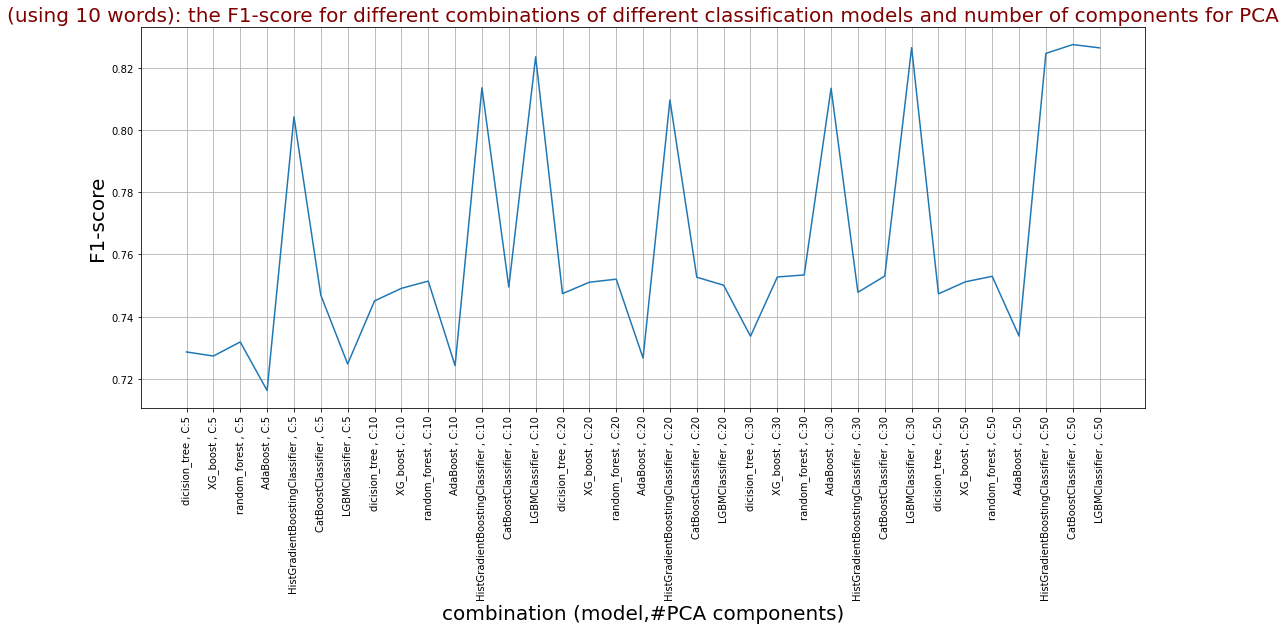

In [62]:
plt.figure(figsize=(18, 7))
plt.plot(combinations,f1_scores)
plt.grid()
plt.xticks(rotation=90) # rotate x-axis labels by 45 degrees.
plt.title("(using 10 words): the F1-score for different combinations of different classification models and number of components for PCA",fontsize=20,color="maroon")
plt.xlabel("combination (model,#PCA components)",fontsize=20)
plt.ylabel("F1-score",fontsize=20)

plt.show()

In [63]:
print("===================================================================")
print(f"Best number of components for PCA , and best model Based on F1-score : {combinations[np.argmax(f1_scores)]}")
print(f"F1-score : {f1_scores[np.argmax(f1_scores)]}")
print("===================================================================")


Best number of components for PCA , and best model Based on F1-score : CatBoostClassifier , C:50
F1-score : 0.8274938169826875


--------

<h3 style="color:maroon;">Build the BaseLine model with the best parameters </h3>

In [64]:
# LGBMClassifier
BaseLine_model_25 = CatBoostClassifier(random_state=0)

# create instance from PCA 
pca = PCA(n_components=50,random_state=0)

# fit PCA 
X_train_pca =pca.fit_transform(X_train)
X_val_pca   =pca.transform(X_val)
X_test_pca   =pca.transform(X_test)

# fit the baseline model on the train data 
BaseLine_model_25.fit(X_train_pca, y_train)

# get predictions 
pred=BaseLine_model_25.predict(X_val_pca)
baseLine_f1_score_value =  f1_score(pred, y_val) 

Learning rate set to 0.064663
0:	learn: 0.6351954	total: 15.9ms	remaining: 15.9s
1:	learn: 0.5865931	total: 30.5ms	remaining: 15.2s
2:	learn: 0.5495538	total: 45.1ms	remaining: 15s
3:	learn: 0.5223700	total: 59ms	remaining: 14.7s
4:	learn: 0.4972789	total: 72.6ms	remaining: 14.4s
5:	learn: 0.4763577	total: 86ms	remaining: 14.2s
6:	learn: 0.4586028	total: 99.1ms	remaining: 14.1s
7:	learn: 0.4462202	total: 112ms	remaining: 13.9s
8:	learn: 0.4337183	total: 126ms	remaining: 13.8s
9:	learn: 0.4261265	total: 139ms	remaining: 13.8s
10:	learn: 0.4207631	total: 152ms	remaining: 13.7s
11:	learn: 0.4125908	total: 166ms	remaining: 13.6s
12:	learn: 0.4072328	total: 179ms	remaining: 13.6s
13:	learn: 0.4023350	total: 196ms	remaining: 13.8s
14:	learn: 0.3981701	total: 210ms	remaining: 13.8s
15:	learn: 0.3942721	total: 223ms	remaining: 13.7s
16:	learn: 0.3912230	total: 236ms	remaining: 13.6s
17:	learn: 0.3875112	total: 249ms	remaining: 13.6s
18:	learn: 0.3839370	total: 262ms	remaining: 13.5s
19:	learn:

161:	learn: 0.3139896	total: 2.23s	remaining: 11.5s
162:	learn: 0.3139101	total: 2.25s	remaining: 11.5s
163:	learn: 0.3137900	total: 2.26s	remaining: 11.5s
164:	learn: 0.3136936	total: 2.27s	remaining: 11.5s
165:	learn: 0.3134909	total: 2.29s	remaining: 11.5s
166:	learn: 0.3134270	total: 2.3s	remaining: 11.5s
167:	learn: 0.3131877	total: 2.31s	remaining: 11.5s
168:	learn: 0.3130993	total: 2.33s	remaining: 11.4s
169:	learn: 0.3130034	total: 2.34s	remaining: 11.4s
170:	learn: 0.3129158	total: 2.35s	remaining: 11.4s
171:	learn: 0.3127948	total: 2.37s	remaining: 11.4s
172:	learn: 0.3127136	total: 2.38s	remaining: 11.4s
173:	learn: 0.3126263	total: 2.4s	remaining: 11.4s
174:	learn: 0.3125698	total: 2.41s	remaining: 11.4s
175:	learn: 0.3124057	total: 2.42s	remaining: 11.4s
176:	learn: 0.3123154	total: 2.45s	remaining: 11.4s
177:	learn: 0.3122073	total: 2.46s	remaining: 11.4s
178:	learn: 0.3120965	total: 2.48s	remaining: 11.4s
179:	learn: 0.3120426	total: 2.5s	remaining: 11.4s
180:	learn: 0.3

328:	learn: 0.3021628	total: 4.69s	remaining: 9.57s
329:	learn: 0.3021256	total: 4.71s	remaining: 9.56s
330:	learn: 0.3020912	total: 4.72s	remaining: 9.54s
331:	learn: 0.3020554	total: 4.73s	remaining: 9.53s
332:	learn: 0.3020057	total: 4.75s	remaining: 9.51s
333:	learn: 0.3019531	total: 4.76s	remaining: 9.49s
334:	learn: 0.3019185	total: 4.77s	remaining: 9.48s
335:	learn: 0.3018788	total: 4.79s	remaining: 9.46s
336:	learn: 0.3018353	total: 4.8s	remaining: 9.45s
337:	learn: 0.3017967	total: 4.82s	remaining: 9.44s
338:	learn: 0.3017850	total: 4.83s	remaining: 9.42s
339:	learn: 0.3017422	total: 4.84s	remaining: 9.4s
340:	learn: 0.3016971	total: 4.86s	remaining: 9.38s
341:	learn: 0.3016660	total: 4.87s	remaining: 9.37s
342:	learn: 0.3016511	total: 4.88s	remaining: 9.35s
343:	learn: 0.3016189	total: 4.9s	remaining: 9.34s
344:	learn: 0.3015875	total: 4.91s	remaining: 9.32s
345:	learn: 0.3014935	total: 4.92s	remaining: 9.31s
346:	learn: 0.3014461	total: 4.94s	remaining: 9.29s
347:	learn: 0.3

489:	learn: 0.2975152	total: 6.9s	remaining: 7.19s
490:	learn: 0.2974961	total: 6.92s	remaining: 7.17s
491:	learn: 0.2974692	total: 6.93s	remaining: 7.16s
492:	learn: 0.2974492	total: 6.95s	remaining: 7.15s
493:	learn: 0.2974227	total: 6.96s	remaining: 7.13s
494:	learn: 0.2974035	total: 6.97s	remaining: 7.12s
495:	learn: 0.2973854	total: 6.99s	remaining: 7.1s
496:	learn: 0.2973728	total: 7s	remaining: 7.08s
497:	learn: 0.2973555	total: 7.01s	remaining: 7.07s
498:	learn: 0.2973401	total: 7.03s	remaining: 7.06s
499:	learn: 0.2973078	total: 7.04s	remaining: 7.04s
500:	learn: 0.2972867	total: 7.06s	remaining: 7.03s
501:	learn: 0.2972589	total: 7.07s	remaining: 7.01s
502:	learn: 0.2972348	total: 7.08s	remaining: 7s
503:	learn: 0.2972088	total: 7.1s	remaining: 6.99s
504:	learn: 0.2971989	total: 7.11s	remaining: 6.97s
505:	learn: 0.2971866	total: 7.13s	remaining: 6.96s
506:	learn: 0.2971551	total: 7.14s	remaining: 6.95s
507:	learn: 0.2971149	total: 7.16s	remaining: 6.93s
508:	learn: 0.2971018

657:	learn: 0.2948724	total: 9.2s	remaining: 4.78s
658:	learn: 0.2948582	total: 9.22s	remaining: 4.77s
659:	learn: 0.2948493	total: 9.23s	remaining: 4.75s
660:	learn: 0.2948396	total: 9.24s	remaining: 4.74s
661:	learn: 0.2948281	total: 9.26s	remaining: 4.73s
662:	learn: 0.2948034	total: 9.27s	remaining: 4.71s
663:	learn: 0.2947942	total: 9.28s	remaining: 4.7s
664:	learn: 0.2947826	total: 9.3s	remaining: 4.68s
665:	learn: 0.2947670	total: 9.31s	remaining: 4.67s
666:	learn: 0.2947400	total: 9.32s	remaining: 4.65s
667:	learn: 0.2947242	total: 9.34s	remaining: 4.64s
668:	learn: 0.2947126	total: 9.35s	remaining: 4.63s
669:	learn: 0.2947075	total: 9.36s	remaining: 4.61s
670:	learn: 0.2946969	total: 9.37s	remaining: 4.59s
671:	learn: 0.2946916	total: 9.39s	remaining: 4.58s
672:	learn: 0.2946858	total: 9.4s	remaining: 4.57s
673:	learn: 0.2946764	total: 9.41s	remaining: 4.55s
674:	learn: 0.2946560	total: 9.43s	remaining: 4.54s
675:	learn: 0.2946442	total: 9.44s	remaining: 4.52s
676:	learn: 0.29

822:	learn: 0.2931534	total: 11.4s	remaining: 2.46s
823:	learn: 0.2931396	total: 11.4s	remaining: 2.44s
824:	learn: 0.2931351	total: 11.4s	remaining: 2.43s
825:	learn: 0.2931233	total: 11.5s	remaining: 2.41s
826:	learn: 0.2931203	total: 11.5s	remaining: 2.4s
827:	learn: 0.2931108	total: 11.5s	remaining: 2.39s
828:	learn: 0.2931019	total: 11.5s	remaining: 2.37s
829:	learn: 0.2930937	total: 11.5s	remaining: 2.36s
830:	learn: 0.2930829	total: 11.5s	remaining: 2.34s
831:	learn: 0.2930794	total: 11.5s	remaining: 2.33s
832:	learn: 0.2930741	total: 11.6s	remaining: 2.32s
833:	learn: 0.2930661	total: 11.6s	remaining: 2.3s
834:	learn: 0.2930428	total: 11.6s	remaining: 2.29s
835:	learn: 0.2930353	total: 11.6s	remaining: 2.27s
836:	learn: 0.2930303	total: 11.6s	remaining: 2.26s
837:	learn: 0.2930238	total: 11.6s	remaining: 2.25s
838:	learn: 0.2930115	total: 11.6s	remaining: 2.23s
839:	learn: 0.2930044	total: 11.7s	remaining: 2.22s
840:	learn: 0.2930017	total: 11.7s	remaining: 2.21s
841:	learn: 0.

983:	learn: 0.2921392	total: 13.6s	remaining: 221ms
984:	learn: 0.2921282	total: 13.6s	remaining: 208ms
985:	learn: 0.2921302	total: 13.7s	remaining: 194ms
986:	learn: 0.2921112	total: 13.7s	remaining: 180ms
987:	learn: 0.2920896	total: 13.7s	remaining: 166ms
988:	learn: 0.2920862	total: 13.7s	remaining: 152ms
989:	learn: 0.2920851	total: 13.7s	remaining: 138ms
990:	learn: 0.2920799	total: 13.7s	remaining: 125ms
991:	learn: 0.2920759	total: 13.7s	remaining: 111ms
992:	learn: 0.2920701	total: 13.7s	remaining: 96.9ms
993:	learn: 0.2920674	total: 13.8s	remaining: 83ms
994:	learn: 0.2920632	total: 13.8s	remaining: 69.2ms
995:	learn: 0.2920541	total: 13.8s	remaining: 55.4ms
996:	learn: 0.2920489	total: 13.8s	remaining: 41.5ms
997:	learn: 0.2920340	total: 13.8s	remaining: 27.7ms
998:	learn: 0.2920261	total: 13.8s	remaining: 13.8ms
999:	learn: 0.2920216	total: 13.8s	remaining: 0us


In [65]:
baseLine_f1_score_value

0.8274938169826875

### Check the performance of the model using a 5-fold cross validation 

Learning rate set to 0.058786
0:	learn: 0.6415355	total: 16ms	remaining: 16s
1:	learn: 0.5968238	total: 30.8ms	remaining: 15.4s
2:	learn: 0.5615953	total: 45.6ms	remaining: 15.2s
3:	learn: 0.5348579	total: 58.6ms	remaining: 14.6s
4:	learn: 0.5054738	total: 71.9ms	remaining: 14.3s
5:	learn: 0.4834420	total: 84.7ms	remaining: 14s
6:	learn: 0.4675120	total: 98.2ms	remaining: 13.9s
7:	learn: 0.4530814	total: 111ms	remaining: 13.7s
8:	learn: 0.4426286	total: 124ms	remaining: 13.6s
9:	learn: 0.4315142	total: 136ms	remaining: 13.5s
10:	learn: 0.4251170	total: 150ms	remaining: 13.5s
11:	learn: 0.4185300	total: 163ms	remaining: 13.4s
12:	learn: 0.4131206	total: 176ms	remaining: 13.3s
13:	learn: 0.4083243	total: 192ms	remaining: 13.5s
14:	learn: 0.4041167	total: 204ms	remaining: 13.4s
15:	learn: 0.3993230	total: 217ms	remaining: 13.3s
16:	learn: 0.3959174	total: 229ms	remaining: 13.3s
17:	learn: 0.3922401	total: 242ms	remaining: 13.2s
18:	learn: 0.3895457	total: 255ms	remaining: 13.1s
19:	learn:

171:	learn: 0.3146921	total: 2.23s	remaining: 10.8s
172:	learn: 0.3145769	total: 2.25s	remaining: 10.7s
173:	learn: 0.3144579	total: 2.26s	remaining: 10.7s
174:	learn: 0.3143487	total: 2.27s	remaining: 10.7s
175:	learn: 0.3142619	total: 2.28s	remaining: 10.7s
176:	learn: 0.3141620	total: 2.3s	remaining: 10.7s
177:	learn: 0.3140865	total: 2.31s	remaining: 10.7s
178:	learn: 0.3139773	total: 2.32s	remaining: 10.7s
179:	learn: 0.3138873	total: 2.33s	remaining: 10.6s
180:	learn: 0.3138073	total: 2.35s	remaining: 10.6s
181:	learn: 0.3137252	total: 2.36s	remaining: 10.6s
182:	learn: 0.3136456	total: 2.37s	remaining: 10.6s
183:	learn: 0.3135448	total: 2.38s	remaining: 10.6s
184:	learn: 0.3134872	total: 2.4s	remaining: 10.6s
185:	learn: 0.3134163	total: 2.41s	remaining: 10.5s
186:	learn: 0.3131695	total: 2.42s	remaining: 10.5s
187:	learn: 0.3130768	total: 2.44s	remaining: 10.5s
188:	learn: 0.3130129	total: 2.45s	remaining: 10.5s
189:	learn: 0.3129411	total: 2.46s	remaining: 10.5s
190:	learn: 0.

343:	learn: 0.3027372	total: 4.45s	remaining: 8.48s
344:	learn: 0.3027026	total: 4.46s	remaining: 8.46s
345:	learn: 0.3026502	total: 4.47s	remaining: 8.45s
346:	learn: 0.3026168	total: 4.48s	remaining: 8.44s
347:	learn: 0.3025166	total: 4.5s	remaining: 8.43s
348:	learn: 0.3024871	total: 4.51s	remaining: 8.41s
349:	learn: 0.3024418	total: 4.53s	remaining: 8.4s
350:	learn: 0.3024153	total: 4.54s	remaining: 8.39s
351:	learn: 0.3023873	total: 4.55s	remaining: 8.38s
352:	learn: 0.3023681	total: 4.56s	remaining: 8.37s
353:	learn: 0.3023261	total: 4.58s	remaining: 8.35s
354:	learn: 0.3022983	total: 4.59s	remaining: 8.34s
355:	learn: 0.3022324	total: 4.61s	remaining: 8.33s
356:	learn: 0.3021895	total: 4.63s	remaining: 8.34s
357:	learn: 0.3021778	total: 4.64s	remaining: 8.33s
358:	learn: 0.3021653	total: 4.66s	remaining: 8.31s
359:	learn: 0.3021319	total: 4.67s	remaining: 8.3s
360:	learn: 0.3020897	total: 4.68s	remaining: 8.29s
361:	learn: 0.3020381	total: 4.69s	remaining: 8.27s
362:	learn: 0.3

509:	learn: 0.2978870	total: 6.62s	remaining: 6.36s
510:	learn: 0.2978616	total: 6.63s	remaining: 6.35s
511:	learn: 0.2978430	total: 6.65s	remaining: 6.34s
512:	learn: 0.2978161	total: 6.66s	remaining: 6.33s
513:	learn: 0.2978065	total: 6.68s	remaining: 6.31s
514:	learn: 0.2978032	total: 6.69s	remaining: 6.3s
515:	learn: 0.2977880	total: 6.7s	remaining: 6.29s
516:	learn: 0.2977685	total: 6.72s	remaining: 6.28s
517:	learn: 0.2977575	total: 6.73s	remaining: 6.26s
518:	learn: 0.2977394	total: 6.74s	remaining: 6.25s
519:	learn: 0.2977258	total: 6.75s	remaining: 6.24s
520:	learn: 0.2977135	total: 6.77s	remaining: 6.22s
521:	learn: 0.2976938	total: 6.78s	remaining: 6.21s
522:	learn: 0.2976693	total: 6.79s	remaining: 6.19s
523:	learn: 0.2976523	total: 6.8s	remaining: 6.18s
524:	learn: 0.2976304	total: 6.82s	remaining: 6.17s
525:	learn: 0.2976069	total: 6.83s	remaining: 6.16s
526:	learn: 0.2975889	total: 6.84s	remaining: 6.14s
527:	learn: 0.2975613	total: 6.86s	remaining: 6.13s
528:	learn: 0.2

680:	learn: 0.2951199	total: 8.82s	remaining: 4.13s
681:	learn: 0.2951162	total: 8.84s	remaining: 4.12s
682:	learn: 0.2951029	total: 8.85s	remaining: 4.11s
683:	learn: 0.2950929	total: 8.86s	remaining: 4.09s
684:	learn: 0.2950747	total: 8.88s	remaining: 4.08s
685:	learn: 0.2950655	total: 8.89s	remaining: 4.07s
686:	learn: 0.2950466	total: 8.9s	remaining: 4.05s
687:	learn: 0.2950267	total: 8.91s	remaining: 4.04s
688:	learn: 0.2950190	total: 8.92s	remaining: 4.03s
689:	learn: 0.2950124	total: 8.94s	remaining: 4.01s
690:	learn: 0.2949971	total: 8.95s	remaining: 4s
691:	learn: 0.2949902	total: 8.96s	remaining: 3.99s
692:	learn: 0.2949791	total: 8.97s	remaining: 3.98s
693:	learn: 0.2949695	total: 8.99s	remaining: 3.96s
694:	learn: 0.2949596	total: 9s	remaining: 3.95s
695:	learn: 0.2949525	total: 9.02s	remaining: 3.94s
696:	learn: 0.2949356	total: 9.03s	remaining: 3.92s
697:	learn: 0.2949159	total: 9.04s	remaining: 3.91s
698:	learn: 0.2949108	total: 9.05s	remaining: 3.9s
699:	learn: 0.294884

844:	learn: 0.2934762	total: 11s	remaining: 2.02s
845:	learn: 0.2934627	total: 11s	remaining: 2.01s
846:	learn: 0.2934599	total: 11s	remaining: 2s
847:	learn: 0.2934469	total: 11.1s	remaining: 1.98s
848:	learn: 0.2934426	total: 11.1s	remaining: 1.97s
849:	learn: 0.2934351	total: 11.1s	remaining: 1.96s
850:	learn: 0.2934275	total: 11.1s	remaining: 1.94s
851:	learn: 0.2934193	total: 11.1s	remaining: 1.93s
852:	learn: 0.2934085	total: 11.1s	remaining: 1.92s
853:	learn: 0.2933975	total: 11.1s	remaining: 1.9s
854:	learn: 0.2933858	total: 11.2s	remaining: 1.89s
855:	learn: 0.2933789	total: 11.2s	remaining: 1.88s
856:	learn: 0.2933696	total: 11.2s	remaining: 1.86s
857:	learn: 0.2933630	total: 11.2s	remaining: 1.85s
858:	learn: 0.2933559	total: 11.2s	remaining: 1.84s
859:	learn: 0.2933483	total: 11.2s	remaining: 1.82s
860:	learn: 0.2933276	total: 11.2s	remaining: 1.81s
861:	learn: 0.2933211	total: 11.2s	remaining: 1.8s
862:	learn: 0.2933208	total: 11.3s	remaining: 1.79s
863:	learn: 0.2933133	t

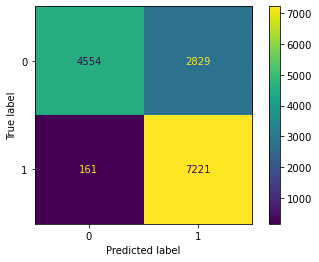

Learning rate set to 0.058786
0:	learn: 0.6462922	total: 15.7ms	remaining: 15.7s
1:	learn: 0.5969547	total: 30.7ms	remaining: 15.3s
2:	learn: 0.5614804	total: 47.1ms	remaining: 15.7s
3:	learn: 0.5366178	total: 62.1ms	remaining: 15.5s
4:	learn: 0.5112053	total: 77.1ms	remaining: 15.3s
5:	learn: 0.4921650	total: 89.6ms	remaining: 14.8s
6:	learn: 0.4755158	total: 103ms	remaining: 14.6s
7:	learn: 0.4621121	total: 116ms	remaining: 14.3s
8:	learn: 0.4522221	total: 128ms	remaining: 14.1s
9:	learn: 0.4417019	total: 141ms	remaining: 14s
10:	learn: 0.4317185	total: 154ms	remaining: 13.8s
11:	learn: 0.4217531	total: 166ms	remaining: 13.7s
12:	learn: 0.4164511	total: 179ms	remaining: 13.6s
13:	learn: 0.4123869	total: 192ms	remaining: 13.5s
14:	learn: 0.4073406	total: 208ms	remaining: 13.6s
15:	learn: 0.4028385	total: 222ms	remaining: 13.6s
16:	learn: 0.3997671	total: 235ms	remaining: 13.6s
17:	learn: 0.3954700	total: 247ms	remaining: 13.5s
18:	learn: 0.3919563	total: 260ms	remaining: 13.4s
19:	lea

172:	learn: 0.3155931	total: 2.23s	remaining: 10.7s
173:	learn: 0.3155096	total: 2.25s	remaining: 10.7s
174:	learn: 0.3154067	total: 2.26s	remaining: 10.6s
175:	learn: 0.3153073	total: 2.27s	remaining: 10.6s
176:	learn: 0.3151992	total: 2.28s	remaining: 10.6s
177:	learn: 0.3151159	total: 2.29s	remaining: 10.6s
178:	learn: 0.3150368	total: 2.31s	remaining: 10.6s
179:	learn: 0.3148710	total: 2.32s	remaining: 10.6s
180:	learn: 0.3147102	total: 2.33s	remaining: 10.6s
181:	learn: 0.3146227	total: 2.35s	remaining: 10.5s
182:	learn: 0.3145517	total: 2.36s	remaining: 10.5s
183:	learn: 0.3144855	total: 2.37s	remaining: 10.5s
184:	learn: 0.3143463	total: 2.38s	remaining: 10.5s
185:	learn: 0.3142551	total: 2.39s	remaining: 10.5s
186:	learn: 0.3141302	total: 2.41s	remaining: 10.5s
187:	learn: 0.3139625	total: 2.42s	remaining: 10.5s
188:	learn: 0.3139032	total: 2.44s	remaining: 10.5s
189:	learn: 0.3138377	total: 2.45s	remaining: 10.5s
190:	learn: 0.3137181	total: 2.47s	remaining: 10.4s
191:	learn: 

331:	learn: 0.3039937	total: 4.24s	remaining: 8.54s
332:	learn: 0.3039348	total: 4.25s	remaining: 8.52s
333:	learn: 0.3038928	total: 4.27s	remaining: 8.51s
334:	learn: 0.3038696	total: 4.28s	remaining: 8.5s
335:	learn: 0.3037985	total: 4.29s	remaining: 8.48s
336:	learn: 0.3037363	total: 4.3s	remaining: 8.47s
337:	learn: 0.3037103	total: 4.32s	remaining: 8.46s
338:	learn: 0.3036903	total: 4.33s	remaining: 8.44s
339:	learn: 0.3036272	total: 4.34s	remaining: 8.43s
340:	learn: 0.3035541	total: 4.35s	remaining: 8.41s
341:	learn: 0.3035039	total: 4.37s	remaining: 8.4s
342:	learn: 0.3034728	total: 4.38s	remaining: 8.39s
343:	learn: 0.3034437	total: 4.39s	remaining: 8.37s
344:	learn: 0.3033405	total: 4.4s	remaining: 8.36s
345:	learn: 0.3033122	total: 4.42s	remaining: 8.35s
346:	learn: 0.3032595	total: 4.43s	remaining: 8.33s
347:	learn: 0.3032278	total: 4.44s	remaining: 8.32s
348:	learn: 0.3032105	total: 4.46s	remaining: 8.31s
349:	learn: 0.3031664	total: 4.47s	remaining: 8.3s
350:	learn: 0.303

490:	learn: 0.2988283	total: 6.24s	remaining: 6.47s
491:	learn: 0.2987929	total: 6.25s	remaining: 6.45s
492:	learn: 0.2987754	total: 6.26s	remaining: 6.44s
493:	learn: 0.2987620	total: 6.28s	remaining: 6.43s
494:	learn: 0.2987549	total: 6.29s	remaining: 6.41s
495:	learn: 0.2987380	total: 6.3s	remaining: 6.4s
496:	learn: 0.2987234	total: 6.31s	remaining: 6.39s
497:	learn: 0.2986933	total: 6.32s	remaining: 6.37s
498:	learn: 0.2986784	total: 6.33s	remaining: 6.36s
499:	learn: 0.2986391	total: 6.35s	remaining: 6.35s
500:	learn: 0.2986280	total: 6.36s	remaining: 6.33s
501:	learn: 0.2986030	total: 6.37s	remaining: 6.32s
502:	learn: 0.2985887	total: 6.38s	remaining: 6.31s
503:	learn: 0.2985714	total: 6.4s	remaining: 6.29s
504:	learn: 0.2985540	total: 6.41s	remaining: 6.28s
505:	learn: 0.2985313	total: 6.42s	remaining: 6.27s
506:	learn: 0.2985144	total: 6.43s	remaining: 6.25s
507:	learn: 0.2984861	total: 6.45s	remaining: 6.25s
508:	learn: 0.2984609	total: 6.46s	remaining: 6.23s
509:	learn: 0.2

659:	learn: 0.2957733	total: 8.33s	remaining: 4.29s
660:	learn: 0.2957606	total: 8.35s	remaining: 4.28s
661:	learn: 0.2957509	total: 8.36s	remaining: 4.27s
662:	learn: 0.2957376	total: 8.37s	remaining: 4.25s
663:	learn: 0.2957304	total: 8.38s	remaining: 4.24s
664:	learn: 0.2957193	total: 8.4s	remaining: 4.23s
665:	learn: 0.2956964	total: 8.41s	remaining: 4.22s
666:	learn: 0.2956859	total: 8.43s	remaining: 4.21s
667:	learn: 0.2956796	total: 8.44s	remaining: 4.2s
668:	learn: 0.2956632	total: 8.46s	remaining: 4.18s
669:	learn: 0.2956524	total: 8.47s	remaining: 4.17s
670:	learn: 0.2956478	total: 8.49s	remaining: 4.16s
671:	learn: 0.2956289	total: 8.51s	remaining: 4.15s
672:	learn: 0.2956212	total: 8.52s	remaining: 4.14s
673:	learn: 0.2956080	total: 8.54s	remaining: 4.13s
674:	learn: 0.2956000	total: 8.55s	remaining: 4.12s
675:	learn: 0.2955908	total: 8.57s	remaining: 4.11s
676:	learn: 0.2955719	total: 8.58s	remaining: 4.09s
677:	learn: 0.2955646	total: 8.6s	remaining: 4.08s
678:	learn: 0.2

824:	learn: 0.2939804	total: 10.6s	remaining: 2.24s
825:	learn: 0.2939726	total: 10.6s	remaining: 2.23s
826:	learn: 0.2939623	total: 10.6s	remaining: 2.22s
827:	learn: 0.2939532	total: 10.6s	remaining: 2.21s
828:	learn: 0.2939340	total: 10.6s	remaining: 2.19s
829:	learn: 0.2939259	total: 10.7s	remaining: 2.18s
830:	learn: 0.2939253	total: 10.7s	remaining: 2.17s
831:	learn: 0.2939113	total: 10.7s	remaining: 2.15s
832:	learn: 0.2938976	total: 10.7s	remaining: 2.14s
833:	learn: 0.2938853	total: 10.7s	remaining: 2.13s
834:	learn: 0.2938718	total: 10.7s	remaining: 2.12s
835:	learn: 0.2938715	total: 10.7s	remaining: 2.1s
836:	learn: 0.2938617	total: 10.7s	remaining: 2.09s
837:	learn: 0.2938521	total: 10.8s	remaining: 2.08s
838:	learn: 0.2938450	total: 10.8s	remaining: 2.07s
839:	learn: 0.2938380	total: 10.8s	remaining: 2.05s
840:	learn: 0.2938274	total: 10.8s	remaining: 2.04s
841:	learn: 0.2938218	total: 10.8s	remaining: 2.03s
842:	learn: 0.2938183	total: 10.8s	remaining: 2.02s
843:	learn: 0

985:	learn: 0.2927591	total: 12.8s	remaining: 182ms
986:	learn: 0.2927573	total: 12.8s	remaining: 169ms
987:	learn: 0.2927536	total: 12.8s	remaining: 156ms
988:	learn: 0.2927443	total: 12.8s	remaining: 143ms
989:	learn: 0.2927277	total: 12.8s	remaining: 130ms
990:	learn: 0.2927217	total: 12.9s	remaining: 117ms
991:	learn: 0.2927160	total: 12.9s	remaining: 104ms
992:	learn: 0.2927028	total: 12.9s	remaining: 90.8ms
993:	learn: 0.2926976	total: 12.9s	remaining: 77.9ms
994:	learn: 0.2926960	total: 12.9s	remaining: 64.9ms
995:	learn: 0.2926859	total: 12.9s	remaining: 51.9ms
996:	learn: 0.2926860	total: 12.9s	remaining: 39ms
997:	learn: 0.2926859	total: 13s	remaining: 26ms
998:	learn: 0.2926686	total: 13s	remaining: 13ms
999:	learn: 0.2926686	total: 13s	remaining: 0us
              precision    recall  f1-score   support

           0       0.97      0.61      0.75      7383
           1       0.72      0.98      0.83      7382

    accuracy                           0.80     14765
   macro 

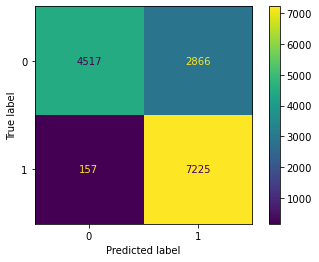

Learning rate set to 0.058786
0:	learn: 0.6470087	total: 20.1ms	remaining: 20.1s
1:	learn: 0.6010412	total: 36.7ms	remaining: 18.3s
2:	learn: 0.5660320	total: 52.2ms	remaining: 17.4s
3:	learn: 0.5404107	total: 68.7ms	remaining: 17.1s
4:	learn: 0.5141040	total: 85ms	remaining: 16.9s
5:	learn: 0.4926430	total: 99.6ms	remaining: 16.5s
6:	learn: 0.4733366	total: 113ms	remaining: 16.1s
7:	learn: 0.4591802	total: 128ms	remaining: 15.9s
8:	learn: 0.4490125	total: 142ms	remaining: 15.6s
9:	learn: 0.4406232	total: 154ms	remaining: 15.3s
10:	learn: 0.4334761	total: 167ms	remaining: 15s
11:	learn: 0.4240855	total: 182ms	remaining: 15s
12:	learn: 0.4154553	total: 196ms	remaining: 14.9s
13:	learn: 0.4101329	total: 208ms	remaining: 14.7s
14:	learn: 0.4051510	total: 221ms	remaining: 14.5s
15:	learn: 0.4005860	total: 234ms	remaining: 14.4s
16:	learn: 0.3972042	total: 247ms	remaining: 14.3s
17:	learn: 0.3926897	total: 260ms	remaining: 14.2s
18:	learn: 0.3902930	total: 273ms	remaining: 14.1s
19:	learn: 

164:	learn: 0.3141879	total: 2.17s	remaining: 11s
165:	learn: 0.3140253	total: 2.19s	remaining: 11s
166:	learn: 0.3139268	total: 2.2s	remaining: 11s
167:	learn: 0.3137978	total: 2.21s	remaining: 11s
168:	learn: 0.3137313	total: 2.23s	remaining: 10.9s
169:	learn: 0.3135365	total: 2.24s	remaining: 10.9s
170:	learn: 0.3134575	total: 2.25s	remaining: 10.9s
171:	learn: 0.3133436	total: 2.26s	remaining: 10.9s
172:	learn: 0.3132369	total: 2.28s	remaining: 10.9s
173:	learn: 0.3131581	total: 2.29s	remaining: 10.9s
174:	learn: 0.3130619	total: 2.3s	remaining: 10.8s
175:	learn: 0.3129842	total: 2.31s	remaining: 10.8s
176:	learn: 0.3129328	total: 2.33s	remaining: 10.8s
177:	learn: 0.3128587	total: 2.34s	remaining: 10.8s
178:	learn: 0.3127179	total: 2.35s	remaining: 10.8s
179:	learn: 0.3125841	total: 2.36s	remaining: 10.8s
180:	learn: 0.3124666	total: 2.38s	remaining: 10.8s
181:	learn: 0.3123618	total: 2.39s	remaining: 10.7s
182:	learn: 0.3122913	total: 2.4s	remaining: 10.7s
183:	learn: 0.3122297	t

329:	learn: 0.3024929	total: 4.38s	remaining: 8.89s
330:	learn: 0.3024445	total: 4.39s	remaining: 8.88s
331:	learn: 0.3024031	total: 4.41s	remaining: 8.87s
332:	learn: 0.3023698	total: 4.42s	remaining: 8.86s
333:	learn: 0.3022923	total: 4.44s	remaining: 8.85s
334:	learn: 0.3022644	total: 4.45s	remaining: 8.84s
335:	learn: 0.3022445	total: 4.46s	remaining: 8.82s
336:	learn: 0.3021753	total: 4.48s	remaining: 8.81s
337:	learn: 0.3021454	total: 4.49s	remaining: 8.8s
338:	learn: 0.3021118	total: 4.5s	remaining: 8.79s
339:	learn: 0.3020488	total: 4.52s	remaining: 8.77s
340:	learn: 0.3020034	total: 4.53s	remaining: 8.76s
341:	learn: 0.3019650	total: 4.54s	remaining: 8.74s
342:	learn: 0.3019339	total: 4.56s	remaining: 8.73s
343:	learn: 0.3019008	total: 4.57s	remaining: 8.71s
344:	learn: 0.3018873	total: 4.58s	remaining: 8.7s
345:	learn: 0.3018355	total: 4.6s	remaining: 8.69s
346:	learn: 0.3017478	total: 4.61s	remaining: 8.68s
347:	learn: 0.3017218	total: 4.62s	remaining: 8.66s
348:	learn: 0.30

488:	learn: 0.2974308	total: 6.57s	remaining: 6.86s
489:	learn: 0.2974119	total: 6.58s	remaining: 6.85s
490:	learn: 0.2973801	total: 6.6s	remaining: 6.84s
491:	learn: 0.2973456	total: 6.61s	remaining: 6.83s
492:	learn: 0.2973221	total: 6.63s	remaining: 6.81s
493:	learn: 0.2972725	total: 6.64s	remaining: 6.8s
494:	learn: 0.2972498	total: 6.66s	remaining: 6.79s
495:	learn: 0.2972373	total: 6.67s	remaining: 6.78s
496:	learn: 0.2972209	total: 6.68s	remaining: 6.76s
497:	learn: 0.2971923	total: 6.7s	remaining: 6.75s
498:	learn: 0.2971651	total: 6.71s	remaining: 6.74s
499:	learn: 0.2971335	total: 6.72s	remaining: 6.72s
500:	learn: 0.2971308	total: 6.74s	remaining: 6.71s
501:	learn: 0.2971116	total: 6.75s	remaining: 6.7s
502:	learn: 0.2970623	total: 6.77s	remaining: 6.69s
503:	learn: 0.2970549	total: 6.78s	remaining: 6.67s
504:	learn: 0.2970334	total: 6.79s	remaining: 6.66s
505:	learn: 0.2970241	total: 6.8s	remaining: 6.64s
506:	learn: 0.2970202	total: 6.82s	remaining: 6.63s
507:	learn: 0.296

659:	learn: 0.2942517	total: 8.81s	remaining: 4.54s
660:	learn: 0.2942448	total: 8.82s	remaining: 4.53s
661:	learn: 0.2942368	total: 8.84s	remaining: 4.51s
662:	learn: 0.2942352	total: 8.85s	remaining: 4.5s
663:	learn: 0.2942215	total: 8.86s	remaining: 4.48s
664:	learn: 0.2942078	total: 8.87s	remaining: 4.47s
665:	learn: 0.2941994	total: 8.88s	remaining: 4.46s
666:	learn: 0.2941917	total: 8.9s	remaining: 4.44s
667:	learn: 0.2941712	total: 8.91s	remaining: 4.43s
668:	learn: 0.2941541	total: 8.92s	remaining: 4.41s
669:	learn: 0.2941455	total: 8.93s	remaining: 4.4s
670:	learn: 0.2941353	total: 8.95s	remaining: 4.39s
671:	learn: 0.2941266	total: 8.96s	remaining: 4.37s
672:	learn: 0.2941078	total: 8.97s	remaining: 4.36s
673:	learn: 0.2940888	total: 8.98s	remaining: 4.34s
674:	learn: 0.2940798	total: 8.99s	remaining: 4.33s
675:	learn: 0.2940712	total: 9.01s	remaining: 4.32s
676:	learn: 0.2940583	total: 9.02s	remaining: 4.3s
677:	learn: 0.2940491	total: 9.03s	remaining: 4.29s
678:	learn: 0.29

821:	learn: 0.2925066	total: 10.8s	remaining: 2.35s
822:	learn: 0.2925003	total: 10.8s	remaining: 2.33s
823:	learn: 0.2924918	total: 10.9s	remaining: 2.32s
824:	learn: 0.2924824	total: 10.9s	remaining: 2.31s
825:	learn: 0.2924731	total: 10.9s	remaining: 2.29s
826:	learn: 0.2924773	total: 10.9s	remaining: 2.28s
827:	learn: 0.2924720	total: 10.9s	remaining: 2.26s
828:	learn: 0.2924746	total: 10.9s	remaining: 2.25s
829:	learn: 0.2924764	total: 10.9s	remaining: 2.24s
830:	learn: 0.2924741	total: 10.9s	remaining: 2.22s
831:	learn: 0.2924741	total: 10.9s	remaining: 2.21s
832:	learn: 0.2924741	total: 11s	remaining: 2.2s
833:	learn: 0.2924741	total: 11s	remaining: 2.18s
834:	learn: 0.2924741	total: 11s	remaining: 2.17s
835:	learn: 0.2924672	total: 11s	remaining: 2.15s
836:	learn: 0.2924680	total: 11s	remaining: 2.14s
837:	learn: 0.2924470	total: 11s	remaining: 2.13s
838:	learn: 0.2924378	total: 11s	remaining: 2.12s
839:	learn: 0.2924323	total: 11s	remaining: 2.1s
840:	learn: 0.2924225	total: 1

985:	learn: 0.2913937	total: 12.8s	remaining: 182ms
986:	learn: 0.2913769	total: 12.8s	remaining: 169ms
987:	learn: 0.2913630	total: 12.9s	remaining: 156ms
988:	learn: 0.2913592	total: 12.9s	remaining: 143ms
989:	learn: 0.2913544	total: 12.9s	remaining: 130ms
990:	learn: 0.2913503	total: 12.9s	remaining: 117ms
991:	learn: 0.2913466	total: 12.9s	remaining: 104ms
992:	learn: 0.2913414	total: 12.9s	remaining: 91.1ms
993:	learn: 0.2913337	total: 12.9s	remaining: 78.1ms
994:	learn: 0.2913202	total: 12.9s	remaining: 65.1ms
995:	learn: 0.2913175	total: 13s	remaining: 52ms
996:	learn: 0.2913151	total: 13s	remaining: 39ms
997:	learn: 0.2913046	total: 13s	remaining: 26ms
998:	learn: 0.2912940	total: 13s	remaining: 13ms
999:	learn: 0.2912903	total: 13s	remaining: 0us
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      7382
           1       0.98      0.60      0.74      7383

    accuracy                           0.79     14765
   macro avg   

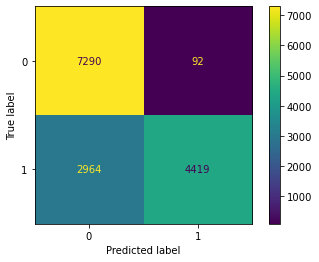

Learning rate set to 0.058786
0:	learn: 0.6453783	total: 15ms	remaining: 15s
1:	learn: 0.5988214	total: 29.6ms	remaining: 14.8s
2:	learn: 0.5626873	total: 43.4ms	remaining: 14.4s
3:	learn: 0.5370989	total: 62.4ms	remaining: 15.5s
4:	learn: 0.5096199	total: 79.7ms	remaining: 15.9s
5:	learn: 0.4893331	total: 97.9ms	remaining: 16.2s
6:	learn: 0.4713425	total: 115ms	remaining: 16.3s
7:	learn: 0.4587290	total: 130ms	remaining: 16.1s
8:	learn: 0.4483343	total: 144ms	remaining: 15.8s
9:	learn: 0.4381252	total: 157ms	remaining: 15.6s
10:	learn: 0.4291037	total: 171ms	remaining: 15.3s
11:	learn: 0.4204964	total: 187ms	remaining: 15.4s
12:	learn: 0.4150544	total: 205ms	remaining: 15.6s
13:	learn: 0.4087319	total: 220ms	remaining: 15.5s
14:	learn: 0.4037958	total: 234ms	remaining: 15.3s
15:	learn: 0.4000074	total: 247ms	remaining: 15.2s
16:	learn: 0.3967212	total: 261ms	remaining: 15.1s
17:	learn: 0.3927907	total: 276ms	remaining: 15.1s
18:	learn: 0.3882762	total: 293ms	remaining: 15.1s
19:	learn

166:	learn: 0.3160195	total: 2.23s	remaining: 11.1s
167:	learn: 0.3159447	total: 2.24s	remaining: 11.1s
168:	learn: 0.3158129	total: 2.25s	remaining: 11.1s
169:	learn: 0.3156608	total: 2.27s	remaining: 11.1s
170:	learn: 0.3156111	total: 2.28s	remaining: 11.1s
171:	learn: 0.3155266	total: 2.29s	remaining: 11s
172:	learn: 0.3153384	total: 2.3s	remaining: 11s
173:	learn: 0.3152200	total: 2.32s	remaining: 11s
174:	learn: 0.3150877	total: 2.33s	remaining: 11s
175:	learn: 0.3150201	total: 2.34s	remaining: 11s
176:	learn: 0.3147726	total: 2.35s	remaining: 11s
177:	learn: 0.3145454	total: 2.37s	remaining: 10.9s
178:	learn: 0.3144688	total: 2.38s	remaining: 10.9s
179:	learn: 0.3143396	total: 2.39s	remaining: 10.9s
180:	learn: 0.3142372	total: 2.41s	remaining: 10.9s
181:	learn: 0.3141424	total: 2.42s	remaining: 10.9s
182:	learn: 0.3140782	total: 2.43s	remaining: 10.9s
183:	learn: 0.3140028	total: 2.45s	remaining: 10.8s
184:	learn: 0.3139258	total: 2.46s	remaining: 10.8s
185:	learn: 0.3138787	tot

327:	learn: 0.3038148	total: 4.26s	remaining: 8.72s
328:	learn: 0.3037854	total: 4.27s	remaining: 8.71s
329:	learn: 0.3037529	total: 4.28s	remaining: 8.69s
330:	learn: 0.3037238	total: 4.29s	remaining: 8.68s
331:	learn: 0.3036957	total: 4.3s	remaining: 8.66s
332:	learn: 0.3036593	total: 4.32s	remaining: 8.65s
333:	learn: 0.3036358	total: 4.33s	remaining: 8.63s
334:	learn: 0.3035886	total: 4.34s	remaining: 8.62s
335:	learn: 0.3035550	total: 4.35s	remaining: 8.61s
336:	learn: 0.3035104	total: 4.37s	remaining: 8.59s
337:	learn: 0.3034806	total: 4.38s	remaining: 8.58s
338:	learn: 0.3034575	total: 4.39s	remaining: 8.56s
339:	learn: 0.3034383	total: 4.4s	remaining: 8.55s
340:	learn: 0.3034125	total: 4.42s	remaining: 8.53s
341:	learn: 0.3033783	total: 4.43s	remaining: 8.52s
342:	learn: 0.3033162	total: 4.44s	remaining: 8.51s
343:	learn: 0.3032606	total: 4.46s	remaining: 8.5s
344:	learn: 0.3032252	total: 4.47s	remaining: 8.48s
345:	learn: 0.3031753	total: 4.48s	remaining: 8.47s
346:	learn: 0.3

487:	learn: 0.2989507	total: 6.28s	remaining: 6.58s
488:	learn: 0.2989277	total: 6.29s	remaining: 6.57s
489:	learn: 0.2989078	total: 6.3s	remaining: 6.56s
490:	learn: 0.2988877	total: 6.31s	remaining: 6.54s
491:	learn: 0.2988791	total: 6.33s	remaining: 6.53s
492:	learn: 0.2988637	total: 6.34s	remaining: 6.52s
493:	learn: 0.2988343	total: 6.35s	remaining: 6.5s
494:	learn: 0.2988127	total: 6.36s	remaining: 6.49s
495:	learn: 0.2987782	total: 6.38s	remaining: 6.48s
496:	learn: 0.2987703	total: 6.39s	remaining: 6.47s
497:	learn: 0.2987581	total: 6.4s	remaining: 6.45s
498:	learn: 0.2987464	total: 6.41s	remaining: 6.44s
499:	learn: 0.2987292	total: 6.43s	remaining: 6.43s
500:	learn: 0.2987245	total: 6.44s	remaining: 6.41s
501:	learn: 0.2987036	total: 6.45s	remaining: 6.4s
502:	learn: 0.2986790	total: 6.46s	remaining: 6.39s
503:	learn: 0.2986603	total: 6.48s	remaining: 6.37s
504:	learn: 0.2986372	total: 6.49s	remaining: 6.36s
505:	learn: 0.2986171	total: 6.5s	remaining: 6.35s
506:	learn: 0.298

656:	learn: 0.2960763	total: 8.36s	remaining: 4.36s
657:	learn: 0.2960688	total: 8.37s	remaining: 4.35s
658:	learn: 0.2960639	total: 8.38s	remaining: 4.34s
659:	learn: 0.2960468	total: 8.39s	remaining: 4.32s
660:	learn: 0.2960379	total: 8.4s	remaining: 4.31s
661:	learn: 0.2960029	total: 8.42s	remaining: 4.3s
662:	learn: 0.2959881	total: 8.43s	remaining: 4.29s
663:	learn: 0.2959717	total: 8.44s	remaining: 4.27s
664:	learn: 0.2959555	total: 8.46s	remaining: 4.26s
665:	learn: 0.2959421	total: 8.47s	remaining: 4.25s
666:	learn: 0.2959315	total: 8.48s	remaining: 4.23s
667:	learn: 0.2959236	total: 8.49s	remaining: 4.22s
668:	learn: 0.2959132	total: 8.51s	remaining: 4.21s
669:	learn: 0.2958853	total: 8.52s	remaining: 4.2s
670:	learn: 0.2958720	total: 8.53s	remaining: 4.18s
671:	learn: 0.2958550	total: 8.54s	remaining: 4.17s
672:	learn: 0.2958362	total: 8.56s	remaining: 4.16s
673:	learn: 0.2958079	total: 8.57s	remaining: 4.14s
674:	learn: 0.2957958	total: 8.58s	remaining: 4.13s
675:	learn: 0.2

819:	learn: 0.2941938	total: 10.4s	remaining: 2.27s
820:	learn: 0.2941867	total: 10.4s	remaining: 2.26s
821:	learn: 0.2941716	total: 10.4s	remaining: 2.25s
822:	learn: 0.2941569	total: 10.4s	remaining: 2.23s
823:	learn: 0.2941374	total: 10.4s	remaining: 2.22s
824:	learn: 0.2941292	total: 10.4s	remaining: 2.21s
825:	learn: 0.2941241	total: 10.4s	remaining: 2.2s
826:	learn: 0.2941083	total: 10.4s	remaining: 2.18s
827:	learn: 0.2941001	total: 10.5s	remaining: 2.17s
828:	learn: 0.2940769	total: 10.5s	remaining: 2.16s
829:	learn: 0.2940708	total: 10.5s	remaining: 2.15s
830:	learn: 0.2940625	total: 10.5s	remaining: 2.13s
831:	learn: 0.2940586	total: 10.5s	remaining: 2.12s
832:	learn: 0.2940541	total: 10.5s	remaining: 2.11s
833:	learn: 0.2940447	total: 10.5s	remaining: 2.1s
834:	learn: 0.2940358	total: 10.5s	remaining: 2.08s
835:	learn: 0.2940270	total: 10.6s	remaining: 2.07s
836:	learn: 0.2940134	total: 10.6s	remaining: 2.06s
837:	learn: 0.2940047	total: 10.6s	remaining: 2.04s
838:	learn: 0.

981:	learn: 0.2928741	total: 12.4s	remaining: 227ms
982:	learn: 0.2928586	total: 12.4s	remaining: 215ms
983:	learn: 0.2928525	total: 12.4s	remaining: 202ms
984:	learn: 0.2928449	total: 12.4s	remaining: 190ms
985:	learn: 0.2928319	total: 12.5s	remaining: 177ms
986:	learn: 0.2928252	total: 12.5s	remaining: 164ms
987:	learn: 0.2928158	total: 12.5s	remaining: 152ms
988:	learn: 0.2928071	total: 12.5s	remaining: 139ms
989:	learn: 0.2928014	total: 12.5s	remaining: 126ms
990:	learn: 0.2927962	total: 12.5s	remaining: 114ms
991:	learn: 0.2927904	total: 12.5s	remaining: 101ms
992:	learn: 0.2927855	total: 12.6s	remaining: 88.6ms
993:	learn: 0.2927829	total: 12.6s	remaining: 75.9ms
994:	learn: 0.2927749	total: 12.6s	remaining: 63.3ms
995:	learn: 0.2927696	total: 12.6s	remaining: 50.6ms
996:	learn: 0.2927643	total: 12.6s	remaining: 38ms
997:	learn: 0.2927643	total: 12.6s	remaining: 25.3ms
998:	learn: 0.2927622	total: 12.6s	remaining: 12.7ms
999:	learn: 0.2927615	total: 12.7s	remaining: 0us
         

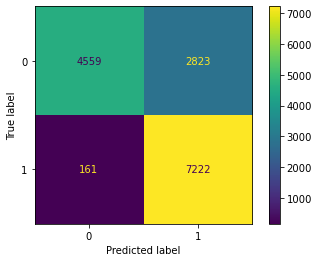

Learning rate set to 0.058786
0:	learn: 0.6473890	total: 14.2ms	remaining: 14.2s
1:	learn: 0.6014374	total: 28.6ms	remaining: 14.3s
2:	learn: 0.5659182	total: 42.8ms	remaining: 14.2s
3:	learn: 0.5390070	total: 55.6ms	remaining: 13.8s
4:	learn: 0.5134008	total: 71ms	remaining: 14.1s
5:	learn: 0.4923886	total: 86.5ms	remaining: 14.3s
6:	learn: 0.4743817	total: 100ms	remaining: 14.2s
7:	learn: 0.4590984	total: 114ms	remaining: 14.1s
8:	learn: 0.4489033	total: 126ms	remaining: 13.9s
9:	learn: 0.4366011	total: 139ms	remaining: 13.8s
10:	learn: 0.4292107	total: 154ms	remaining: 13.9s
11:	learn: 0.4212441	total: 170ms	remaining: 14s
12:	learn: 0.4162031	total: 185ms	remaining: 14.1s
13:	learn: 0.4113803	total: 202ms	remaining: 14.2s
14:	learn: 0.4046395	total: 217ms	remaining: 14.2s
15:	learn: 0.4008036	total: 231ms	remaining: 14.2s
16:	learn: 0.3973572	total: 245ms	remaining: 14.2s
17:	learn: 0.3929572	total: 259ms	remaining: 14.1s
18:	learn: 0.3893517	total: 276ms	remaining: 14.2s
19:	learn

163:	learn: 0.3147150	total: 2.19s	remaining: 11.2s
164:	learn: 0.3145936	total: 2.2s	remaining: 11.2s
165:	learn: 0.3144800	total: 2.22s	remaining: 11.1s
166:	learn: 0.3144124	total: 2.23s	remaining: 11.1s
167:	learn: 0.3143045	total: 2.24s	remaining: 11.1s
168:	learn: 0.3141789	total: 2.26s	remaining: 11.1s
169:	learn: 0.3140032	total: 2.27s	remaining: 11.1s
170:	learn: 0.3139139	total: 2.29s	remaining: 11.1s
171:	learn: 0.3138236	total: 2.3s	remaining: 11.1s
172:	learn: 0.3137442	total: 2.32s	remaining: 11.1s
173:	learn: 0.3136064	total: 2.33s	remaining: 11.1s
174:	learn: 0.3134380	total: 2.35s	remaining: 11.1s
175:	learn: 0.3133520	total: 2.36s	remaining: 11.1s
176:	learn: 0.3131718	total: 2.38s	remaining: 11.1s
177:	learn: 0.3130672	total: 2.4s	remaining: 11.1s
178:	learn: 0.3129976	total: 2.41s	remaining: 11.1s
179:	learn: 0.3128720	total: 2.42s	remaining: 11s
180:	learn: 0.3128113	total: 2.44s	remaining: 11s
181:	learn: 0.3127528	total: 2.45s	remaining: 11s
182:	learn: 0.3126918

324:	learn: 0.3025054	total: 4.4s	remaining: 9.15s
325:	learn: 0.3024698	total: 4.42s	remaining: 9.13s
326:	learn: 0.3024369	total: 4.43s	remaining: 9.12s
327:	learn: 0.3023941	total: 4.44s	remaining: 9.1s
328:	learn: 0.3023567	total: 4.46s	remaining: 9.09s
329:	learn: 0.3022975	total: 4.47s	remaining: 9.07s
330:	learn: 0.3022644	total: 4.48s	remaining: 9.05s
331:	learn: 0.3022037	total: 4.49s	remaining: 9.04s
332:	learn: 0.3021694	total: 4.5s	remaining: 9.02s
333:	learn: 0.3021232	total: 4.52s	remaining: 9.01s
334:	learn: 0.3020856	total: 4.53s	remaining: 8.99s
335:	learn: 0.3020017	total: 4.54s	remaining: 8.98s
336:	learn: 0.3019586	total: 4.55s	remaining: 8.96s
337:	learn: 0.3019296	total: 4.57s	remaining: 8.95s
338:	learn: 0.3018561	total: 4.58s	remaining: 8.93s
339:	learn: 0.3017966	total: 4.59s	remaining: 8.92s
340:	learn: 0.3017747	total: 4.61s	remaining: 8.9s
341:	learn: 0.3017324	total: 4.62s	remaining: 8.89s
342:	learn: 0.3017056	total: 4.63s	remaining: 8.87s
343:	learn: 0.30

484:	learn: 0.2974971	total: 6.42s	remaining: 6.82s
485:	learn: 0.2974821	total: 6.44s	remaining: 6.81s
486:	learn: 0.2974518	total: 6.45s	remaining: 6.8s
487:	learn: 0.2974396	total: 6.47s	remaining: 6.79s
488:	learn: 0.2974206	total: 6.48s	remaining: 6.77s
489:	learn: 0.2973993	total: 6.49s	remaining: 6.75s
490:	learn: 0.2973876	total: 6.5s	remaining: 6.74s
491:	learn: 0.2973731	total: 6.51s	remaining: 6.73s
492:	learn: 0.2973543	total: 6.53s	remaining: 6.71s
493:	learn: 0.2973314	total: 6.54s	remaining: 6.7s
494:	learn: 0.2973164	total: 6.55s	remaining: 6.68s
495:	learn: 0.2972824	total: 6.57s	remaining: 6.67s
496:	learn: 0.2972709	total: 6.58s	remaining: 6.66s
497:	learn: 0.2972572	total: 6.59s	remaining: 6.64s
498:	learn: 0.2972087	total: 6.6s	remaining: 6.63s
499:	learn: 0.2971863	total: 6.61s	remaining: 6.61s
500:	learn: 0.2971665	total: 6.63s	remaining: 6.6s
501:	learn: 0.2971527	total: 6.64s	remaining: 6.59s
502:	learn: 0.2971265	total: 6.66s	remaining: 6.58s
503:	learn: 0.297

646:	learn: 0.2947068	total: 8.47s	remaining: 4.62s
647:	learn: 0.2946967	total: 8.48s	remaining: 4.61s
648:	learn: 0.2946831	total: 8.49s	remaining: 4.59s
649:	learn: 0.2946622	total: 8.51s	remaining: 4.58s
650:	learn: 0.2946491	total: 8.52s	remaining: 4.57s
651:	learn: 0.2946431	total: 8.53s	remaining: 4.55s
652:	learn: 0.2946267	total: 8.54s	remaining: 4.54s
653:	learn: 0.2946151	total: 8.56s	remaining: 4.53s
654:	learn: 0.2945972	total: 8.57s	remaining: 4.51s
655:	learn: 0.2945850	total: 8.58s	remaining: 4.5s
656:	learn: 0.2945763	total: 8.59s	remaining: 4.49s
657:	learn: 0.2945608	total: 8.61s	remaining: 4.47s
658:	learn: 0.2945559	total: 8.62s	remaining: 4.46s
659:	learn: 0.2945415	total: 8.63s	remaining: 4.45s
660:	learn: 0.2945189	total: 8.64s	remaining: 4.43s
661:	learn: 0.2945103	total: 8.65s	remaining: 4.42s
662:	learn: 0.2944882	total: 8.67s	remaining: 4.41s
663:	learn: 0.2944781	total: 8.68s	remaining: 4.39s
664:	learn: 0.2944697	total: 8.7s	remaining: 4.38s
665:	learn: 0.

805:	learn: 0.2929077	total: 10.5s	remaining: 2.52s
806:	learn: 0.2929078	total: 10.5s	remaining: 2.51s
807:	learn: 0.2928983	total: 10.5s	remaining: 2.49s
808:	learn: 0.2928905	total: 10.5s	remaining: 2.48s
809:	learn: 0.2928850	total: 10.5s	remaining: 2.47s
810:	learn: 0.2928713	total: 10.5s	remaining: 2.45s
811:	learn: 0.2928641	total: 10.5s	remaining: 2.44s
812:	learn: 0.2928558	total: 10.6s	remaining: 2.43s
813:	learn: 0.2928504	total: 10.6s	remaining: 2.42s
814:	learn: 0.2928354	total: 10.6s	remaining: 2.4s
815:	learn: 0.2928162	total: 10.6s	remaining: 2.39s
816:	learn: 0.2927951	total: 10.6s	remaining: 2.38s
817:	learn: 0.2927869	total: 10.6s	remaining: 2.36s
818:	learn: 0.2927813	total: 10.6s	remaining: 2.35s
819:	learn: 0.2927754	total: 10.6s	remaining: 2.34s
820:	learn: 0.2927733	total: 10.7s	remaining: 2.32s
821:	learn: 0.2927668	total: 10.7s	remaining: 2.31s
822:	learn: 0.2927635	total: 10.7s	remaining: 2.3s
823:	learn: 0.2927504	total: 10.7s	remaining: 2.28s
824:	learn: 0.

977:	learn: 0.2915923	total: 12.6s	remaining: 284ms
978:	learn: 0.2915884	total: 12.6s	remaining: 271ms
979:	learn: 0.2915843	total: 12.6s	remaining: 258ms
980:	learn: 0.2915742	total: 12.6s	remaining: 245ms
981:	learn: 0.2915666	total: 12.7s	remaining: 232ms
982:	learn: 0.2915628	total: 12.7s	remaining: 219ms
983:	learn: 0.2915629	total: 12.7s	remaining: 206ms
984:	learn: 0.2915579	total: 12.7s	remaining: 193ms
985:	learn: 0.2915471	total: 12.7s	remaining: 180ms
986:	learn: 0.2915431	total: 12.7s	remaining: 168ms
987:	learn: 0.2915334	total: 12.7s	remaining: 155ms
988:	learn: 0.2915339	total: 12.7s	remaining: 142ms
989:	learn: 0.2915285	total: 12.8s	remaining: 129ms
990:	learn: 0.2915212	total: 12.8s	remaining: 116ms
991:	learn: 0.2915158	total: 12.8s	remaining: 103ms
992:	learn: 0.2915069	total: 12.8s	remaining: 90.2ms
993:	learn: 0.2914999	total: 12.8s	remaining: 77.3ms
994:	learn: 0.2914985	total: 12.8s	remaining: 64.4ms
995:	learn: 0.2915000	total: 12.8s	remaining: 51.5ms
996:	lea

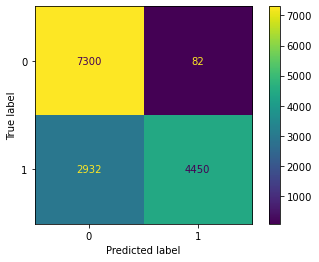

the f1-score in all iterations       : [0.82847637 0.82699021 0.74306373 0.82878127 0.74702031]
the mean of f1-scores                : 0.7948663784287543
the std  of f1-scores                : 0.04070516538072842


In [66]:
clf = CatBoostClassifier(random_state=0)
baseLine_mean,baseLine_std , baseLine_Score_Lst = apply_CV_F1(clf,X_train_pca,y_train)

### Save the BaseLine model

In [67]:
# save the model to disk
import pickle
filename = 'BaseLine_model_25.pkl'
pickle.dump(BaseLine_model_25, open(filename, 'wb'))

In [68]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_pca, y_test)
print(result)

0.7955949284785435


-------------

In [12]:
f1_score = [0.82847637, 0.82699021, 0.74306373, 0.82878127, 0.74702031]

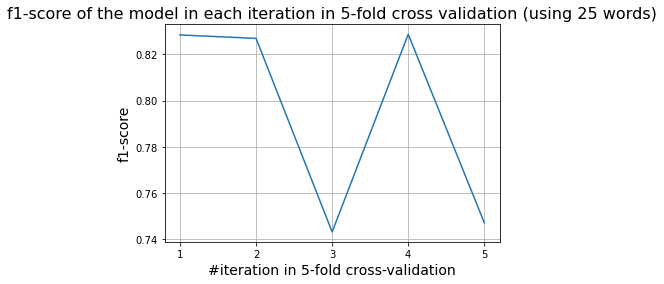

In [15]:
# Plotting the Graph
plt.plot(['1','2','3','4','5'], f1_score)
plt.title("f1-score of the model in each iteration in 5-fold cross validation (using 25 words)",fontsize=16)
plt.xlabel("#iteration in 5-fold cross-validation",fontsize=14)
plt.ylabel("f1-score",fontsize=14)
plt.grid()
plt.show()

## References 

[1] https://www.csmining.org/cdmc2021/index.php?id=5

[2] https://keras.io/api/applications/
    